Seaborn has a high-level interface as compared to low level of matplotlib. It helps in unearthing hidden correlations between variables or trends that might not be obvious initially. 
--helps understand data better due to capability to create amplified data visuals. 

Seaborn makes data(plots and charts) look more engaging. It makes visualization and exploration easy.
--> limitations in matplotlib that seaborn fixes:
    1. seaborn comes with large high-level interfaces and customized themes that is not easy to conquer due to complicated setting of matplotlib
    2. Matplotlib functions don't work well with dataframes, whereas seaborn does it better. 
    

# seaborn is just wrappers on matplotlib to make things easy and gives richer visualizations. 

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [16]:
df_HR = pd.read_csv('HR_Employee_Attrition_Data.csv')
df_HR.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               3   
3                 3          4  Life Sciences              1               4   
4                 2          1        Medical              1               5   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [17]:
df_HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [25]:
df_hr_num = df_HR.select_dtypes(include = 'number')
df_hr_cat = df_HR.select_dtypes(include = 'object')

In [26]:
print(df_hr_num.columns)
print(df_hr_cat.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [27]:
df_hr_num.drop(['EmployeeCount', 'StandardHours'], inplace = True, axis = 1)
df_hr_num.head()

Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0   41       1102                 1          2               1   
1   49        279                 8          1               2   
2   37       1373                 2          2               3   
3   33       1392                 3          4               4   
4   27        591                 2          1               5   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
0                4  ...                  3                         1   
1                2  ...                  4                         4   
2                3  ...                  3                         2   
3                3  ...                  3                         3   
4                2  ...                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2  

[5 rows x 24 columns]

In [29]:
df_hr_cat.drop('Over18', inplace = True, axis = 1)

In [31]:
df_hr_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [14]:
# finding nunique() values in cat columns: 

for x in df_hr_cat.columns:
    if df_hr_cat[x].nunique() < 5:
        print(f"column {x} has {df_hr_cat[x].nunique()} values")

column Attrition has 2 values
column BusinessTravel has 3 values
column Department has 3 values
column Gender has 2 values
column MaritalStatus has 3 values
column Over18 has 1 values
column OverTime has 2 values


In [15]:
for x in df_hr_num.columns:
    if df_hr_num[x].nunique() < 5:
        print(f"column {x} has {df_hr_num[x].nunique()} values")

column EmployeeCount has 1 values
column EnvironmentSatisfaction has 4 values
column JobInvolvement has 4 values
column JobSatisfaction has 4 values
column PerformanceRating has 2 values
column RelationshipSatisfaction has 4 values
column StandardHours has 1 values
column StockOptionLevel has 4 values
column WorkLifeBalance has 4 values


In [32]:
df_hr_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       2940 non-null   object
 1   BusinessTravel  2940 non-null   object
 2   Department      2940 non-null   object
 3   EducationField  2940 non-null   object
 4   Gender          2940 non-null   object
 5   JobRole         2940 non-null   object
 6   MaritalStatus   2940 non-null   object
 7   OverTime        2940 non-null   object
dtypes: object(8)
memory usage: 183.9+ KB


In [34]:
df_hr_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       2940 non-null   int64
 1   DailyRate                 2940 non-null   int64
 2   DistanceFromHome          2940 non-null   int64
 3   Education                 2940 non-null   int64
 4   EmployeeNumber            2940 non-null   int64
 5   EnvironmentSatisfaction   2940 non-null   int64
 6   HourlyRate                2940 non-null   int64
 7   JobInvolvement            2940 non-null   int64
 8   JobLevel                  2940 non-null   int64
 9   JobSatisfaction           2940 non-null   int64
 10  MonthlyIncome             2940 non-null   int64
 11  MonthlyRate               2940 non-null   int64
 12  NumCompaniesWorked        2940 non-null   int64
 13  PercentSalaryHike         2940 non-null   int64
 14  PerformanceRating         2940 non-null 

In [35]:
df_hr_num.describe()  # statistical information for numerical data

Age    DailyRate  DistanceFromHome    Education  \
count  2940.000000  2940.000000       2940.000000  2940.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.133819   403.440447          8.105485     1.023991   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     2940.000000              2940.000000  2940.000000     2940.000000   
mean      1470.500000                 2.721769    65.891156        2.729932   
std        848.849221                 1.092896    20.325969        0.711440   
min          1.000000                 1.000000    30.000000        1.000000   
25%        735.750000                 2.000000    48.000000        2.000000   
50%       1470.500000                 3.000000    66.000000        3.000000   
75%       2205.250000                 4.000000    84.000000        3.000000   
max       2940.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  ...  PerformanceRating  \
count  2940.000000      2940.000000  ...        2940.000000   
mean      2.063946         2.728571  ...           3.153741   
std       1.106752         1.102658  ...           0.360762   
min       1.000000         1.000000  ...           3.000000   
25%       1.000000         2.000000  ...           3.000000   
50%       2.000000         3.000000  ...           3.000000   
75%       3.000000         4.000000  ...           3.000000   
max       5.000000         4.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               2940.000000       2940.000000        2940.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081025          0.851932           7.779458   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            2940.000000      2940.000000     2940.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289051         0.706356        6.125483   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         2940.000000              2940.000000           2940.000000  
mean             4.229252                 2.187755              4.123129  
std              3.622521                 3.221882              3.567529  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 24 columns]

In [36]:
df_hr_cat.describe()  # frequency table for categorical data

Attrition BusinessTravel              Department EducationField Gender  \
count       2940           2940                    2940           2940   2940   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        2466           2086                    1922           1212   1764   

                JobRole MaritalStatus OverTime  
count              2940          2940     2940  
unique                9             3        2  
top     Sales Executive       Married       No  
freq                652          1346     2108

# visualizing statistical relationships: 

RELATIONAL PLOT
relplot = scatter,line plot

CATPLOT
catplot = hist, bar, box, violinplot, stripplots


--> to get lineplot, we can use either relplot( with kind = line) or lineplot itself

--> similarly, for scatterplot, we can use either relplot(with kind = scatter) or scatterplot

--> kind = scatterplot is default 

# scatterplot

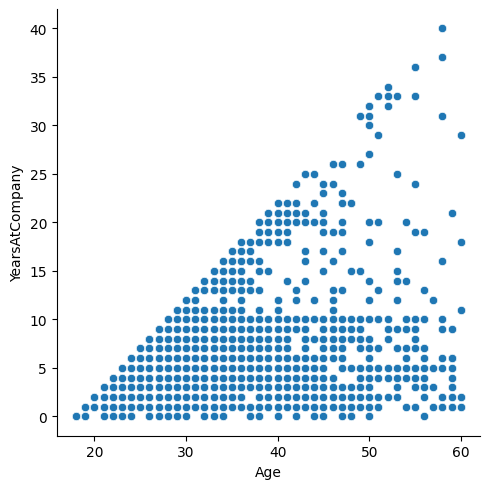

In [43]:
sns.relplot(kind = 'scatter', data = df_hr_num, x = 'Age', y = 'YearsAtCompany' )

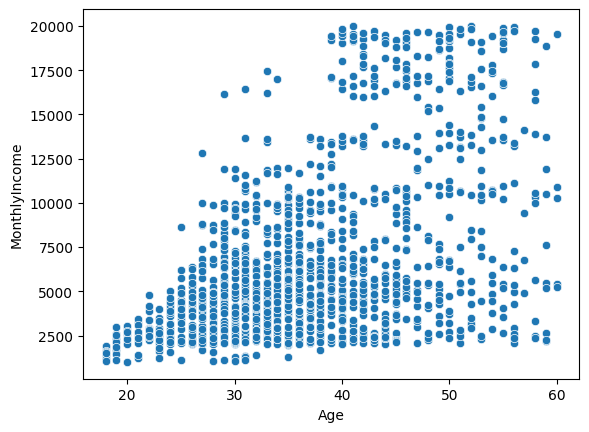

In [45]:
sns.scatterplot(data = df_HR, x = 'Age', y = 'MonthlyIncome')
plt.show()

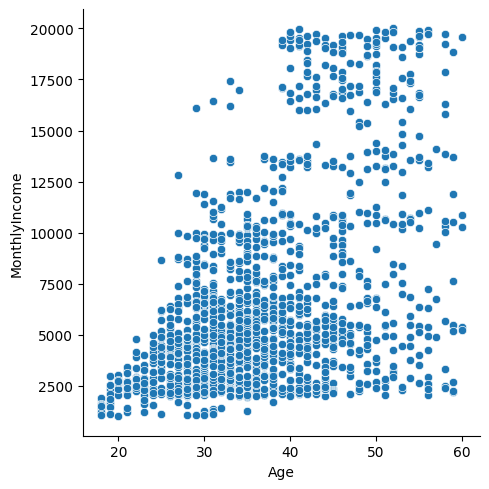

In [50]:
sns.relplot(x = df_hr_num['Age'], y = df_hr_num['MonthlyIncome'], kind = 'scatter')
plt.show()

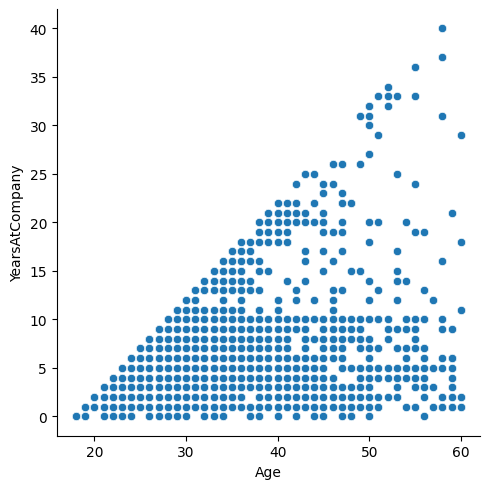

In [46]:
sns.relplot(data = df_hr_num, x = 'Age', y = 'YearsAtCompany') # by default, displays scatter plot
plt.show()

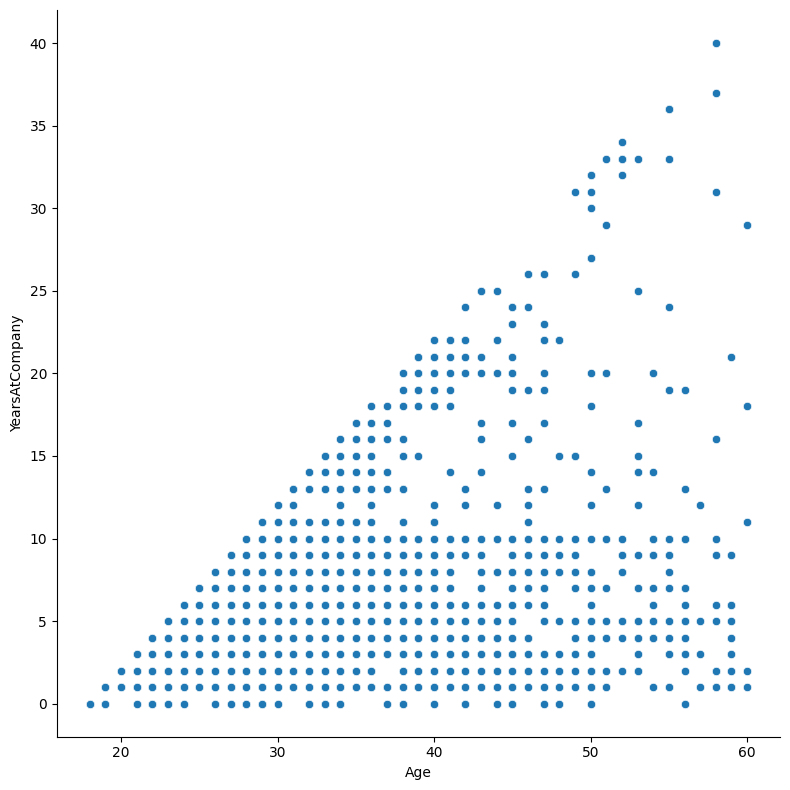

In [55]:
sns.relplot(data = df_hr_num, x = 'Age', y = 'YearsAtCompany', height = 8, aspect = 1) 
plt.show()

# aspect adjusts the width based on height parameter given 

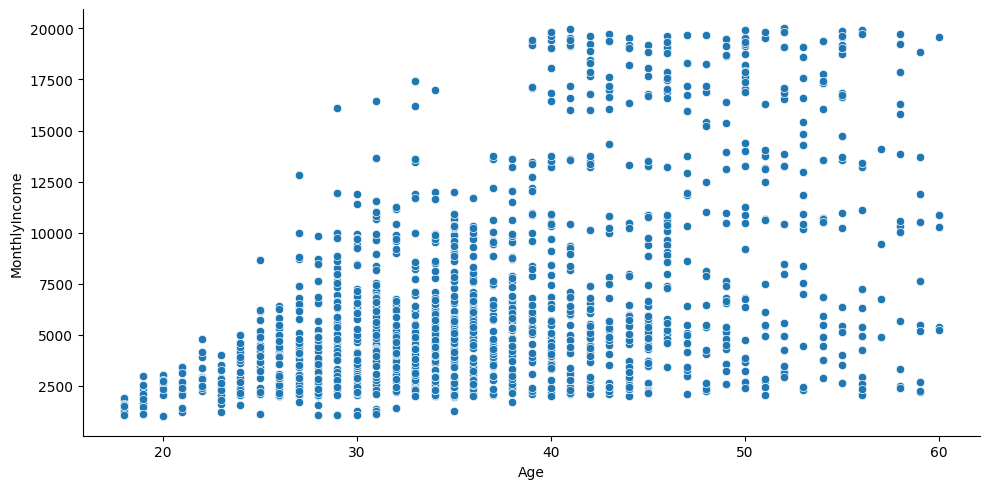

In [56]:
sns.relplot(data = df_hr_num, x = 'Age', y = 'MonthlyIncome', height = 5, aspect = 2) 
plt.show()

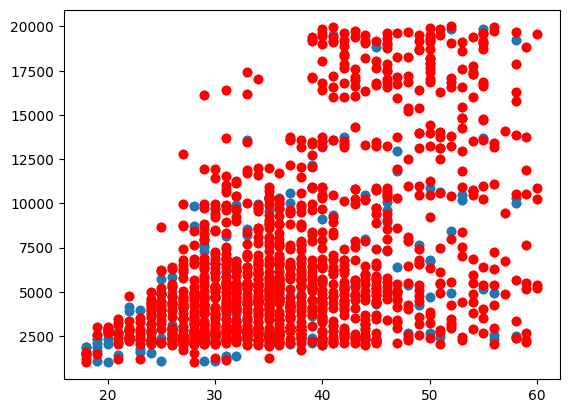

In [67]:
# to see how many of them left the company and how many still works in the company and plot seperate scatterplots
# for each


# Using matplotlib 

df_Mi_yes = df_HR[df_HR['Attrition'] == 'Yes']
df_Mi_no = df_HR[df_HR['Attrition'] == 'No']

plt.figure()
plt.scatter(df_Mi_yes['Age'], df_Mi_yes['MonthlyIncome'])
plt.scatter(df_Mi_no['Age'], df_Mi_no['MonthlyIncome'], color = 'red')

In [69]:
# seaborn has an additional parameter 'hue' to get extra depth ( differnet colors/shades in same)

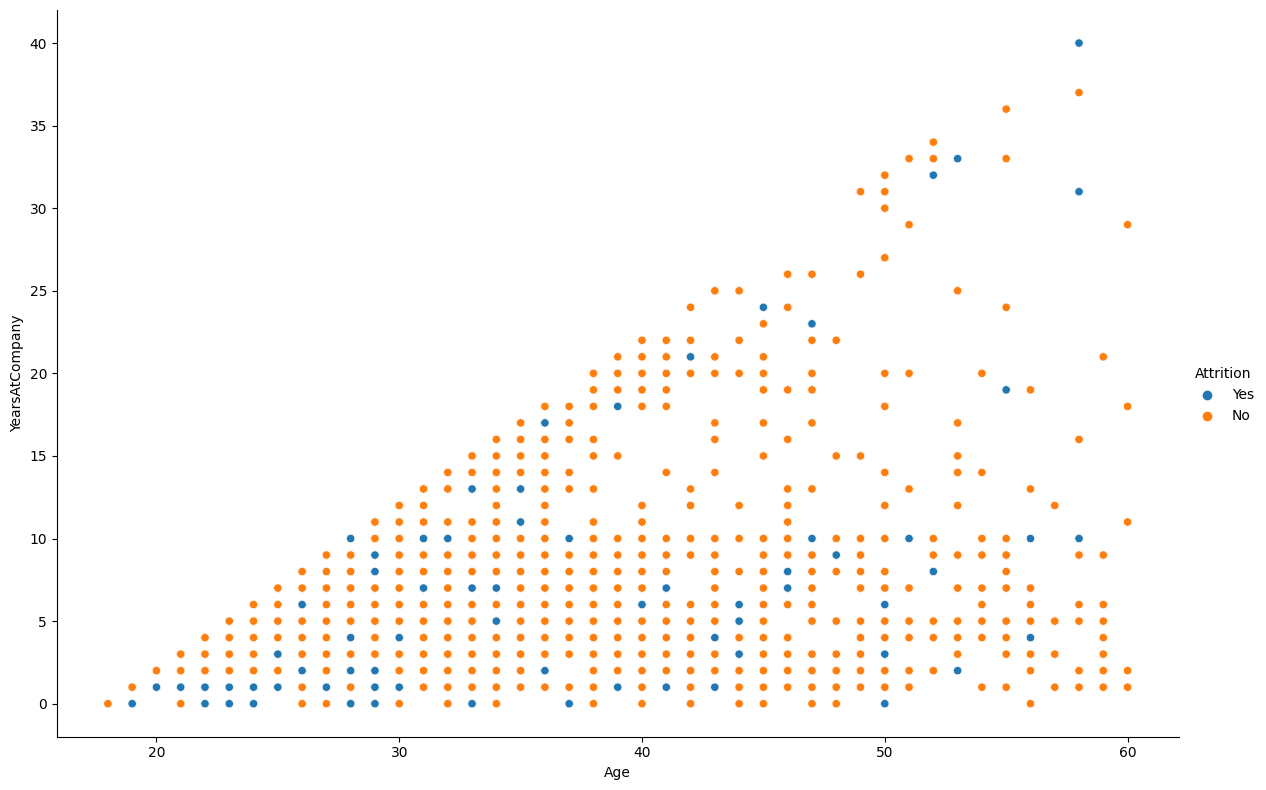

In [68]:
sns.relplot(data = df_HR, x = 'Age', y = "YearsAtCompany", height = 8, aspect = 1.5, hue = 'Attrition')
plt.show()

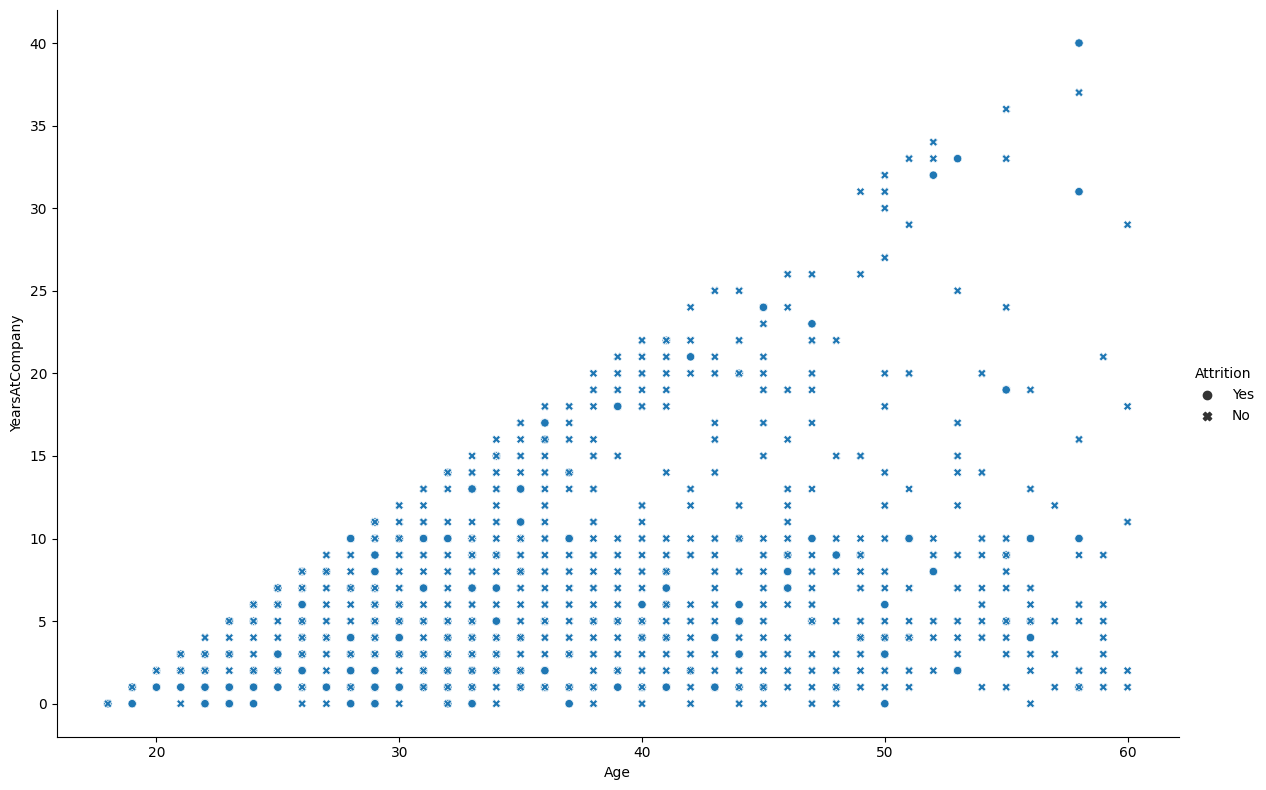

In [70]:
sns.relplot(data = df_HR, x = 'Age', y = "YearsAtCompany", height = 8, aspect = 1.5, style = 'Attrition')
plt.show()
#style gives different markers

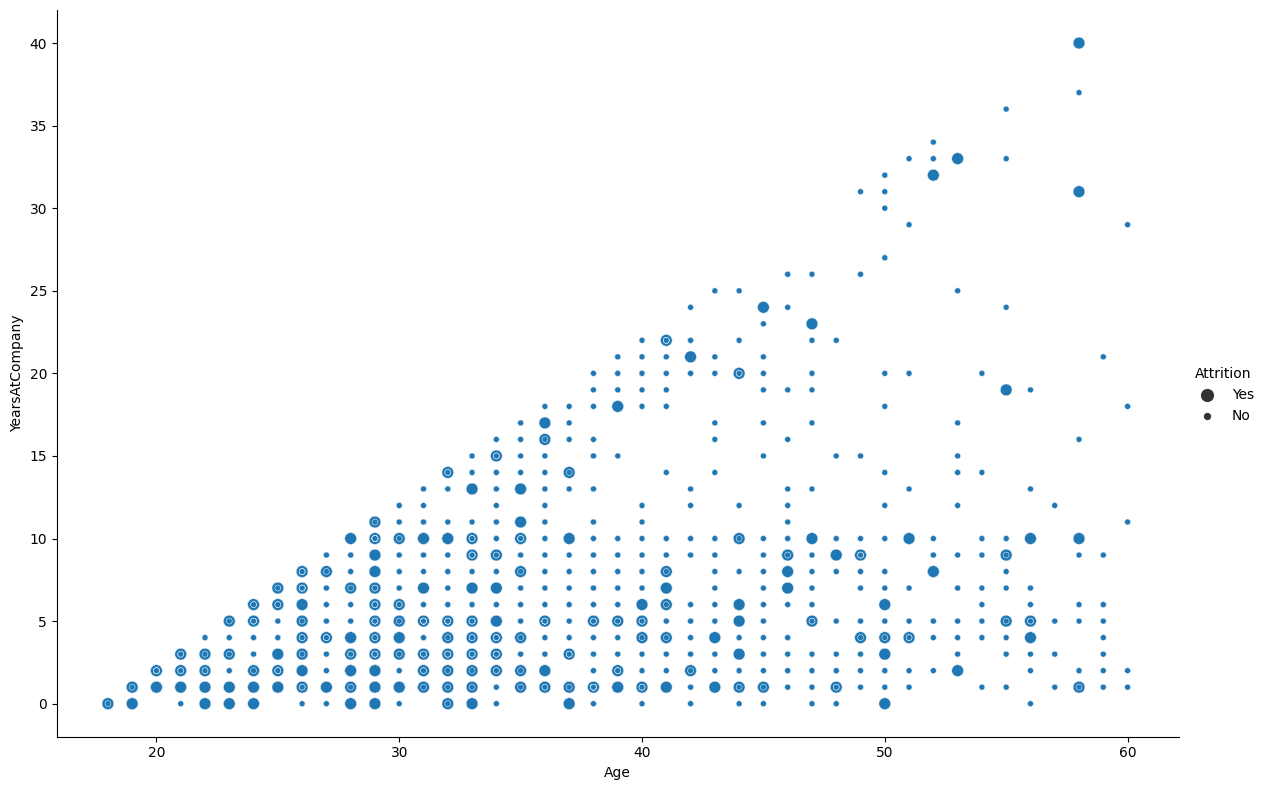

In [71]:
sns.relplot(data = df_HR, x = 'Age', y = "YearsAtCompany", height = 8, aspect = 1.5, size= 'Attrition')
plt.show()

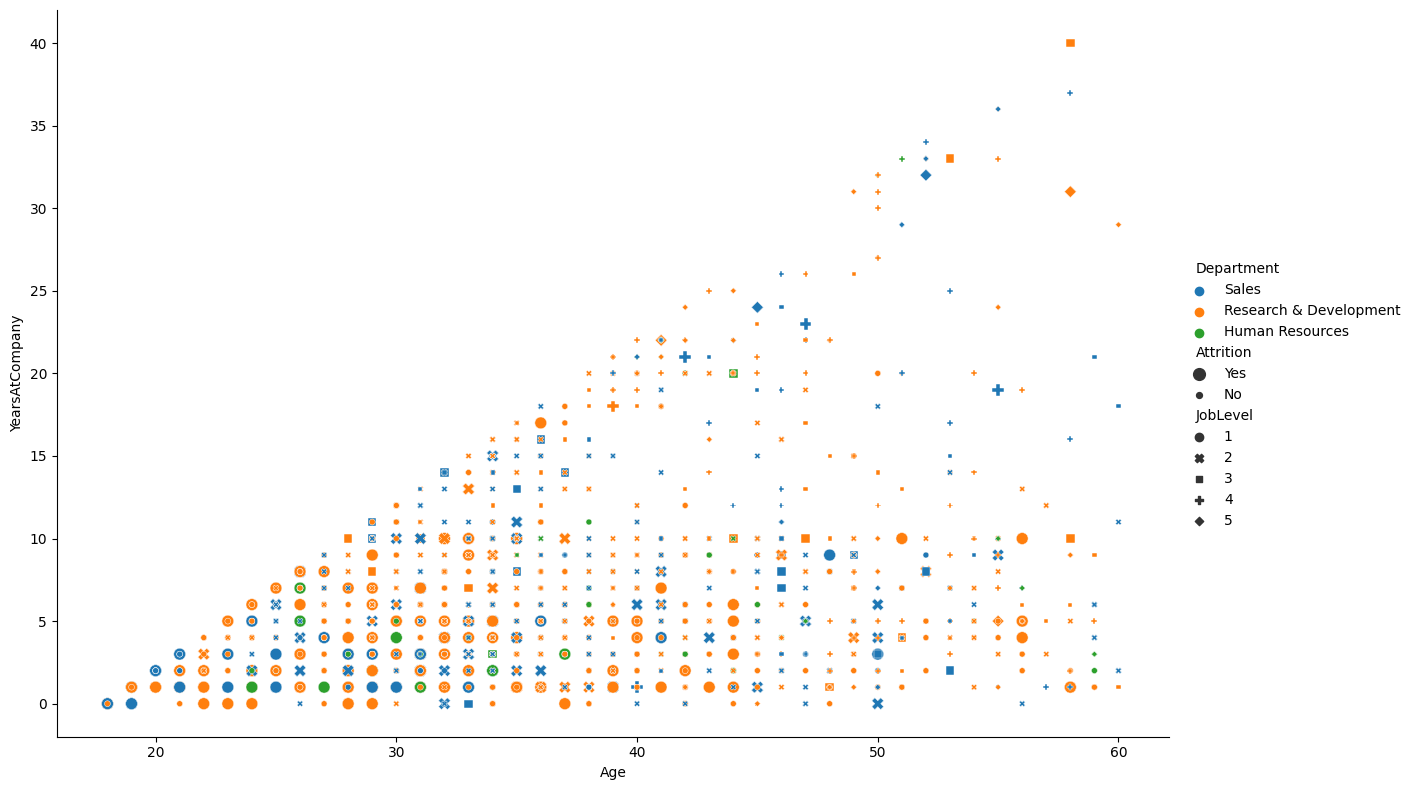

In [72]:
# doing all of them together/ we can do few of them together too

sns.relplot(data = df_HR, x = 'Age', y = "YearsAtCompany", height = 8, aspect = 1.5, hue= 'Department',style = \
           'JobLevel', size = 'Attrition')
plt.show()

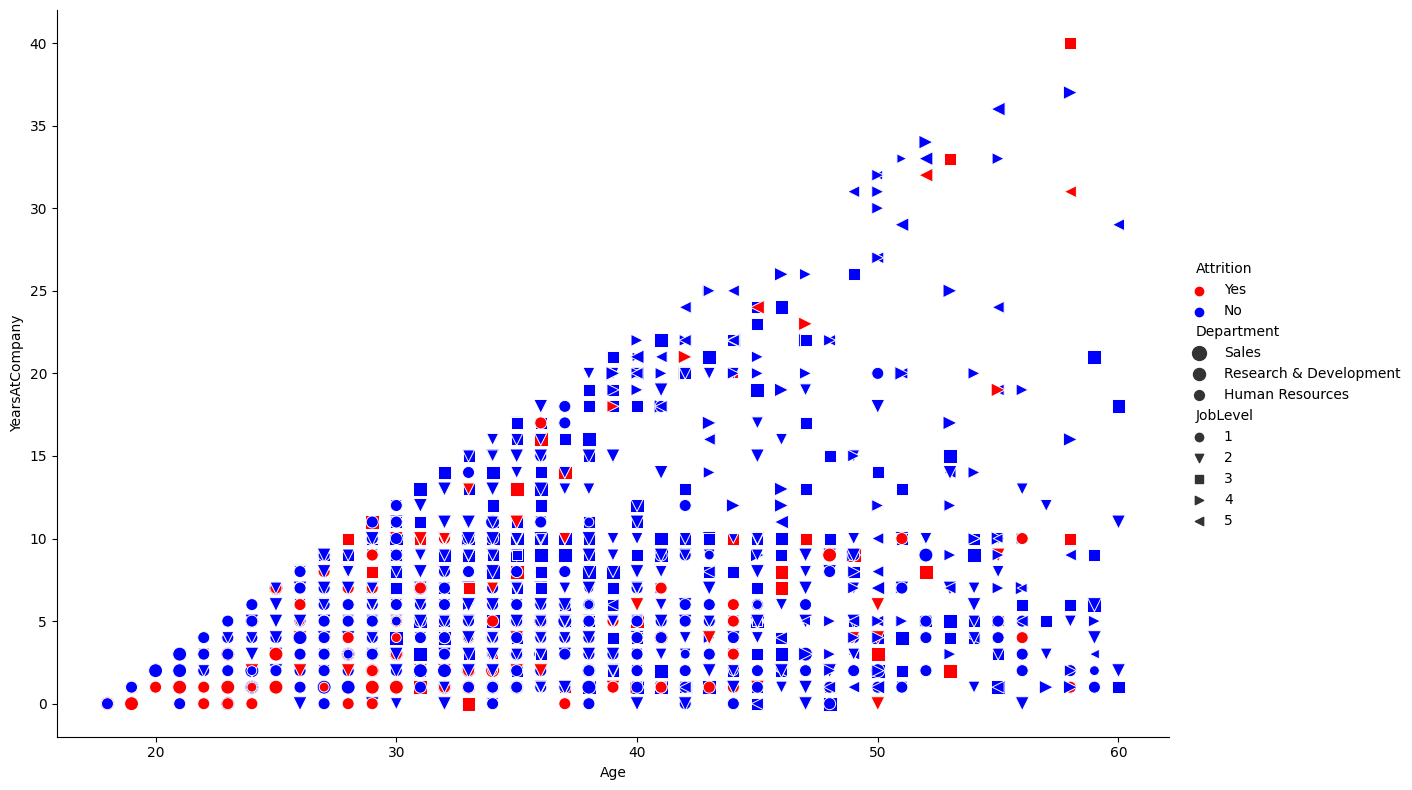

In [75]:
sns.relplot(data = df_HR, x = 'Age', y = 'YearsAtCompany', height = 8, size = 'Department', aspect = 1.5,\
           style = 'JobLevel', hue = 'Attrition', markers = ['o','v', 's','>','<'],sizes= (50,100),\
            palette = ['red','blue'])

# size parameter specifies the size levels for the markers( depending on number of levels, here size, style, hue)
# so it might take 50,75,100 - divides the range as per levels

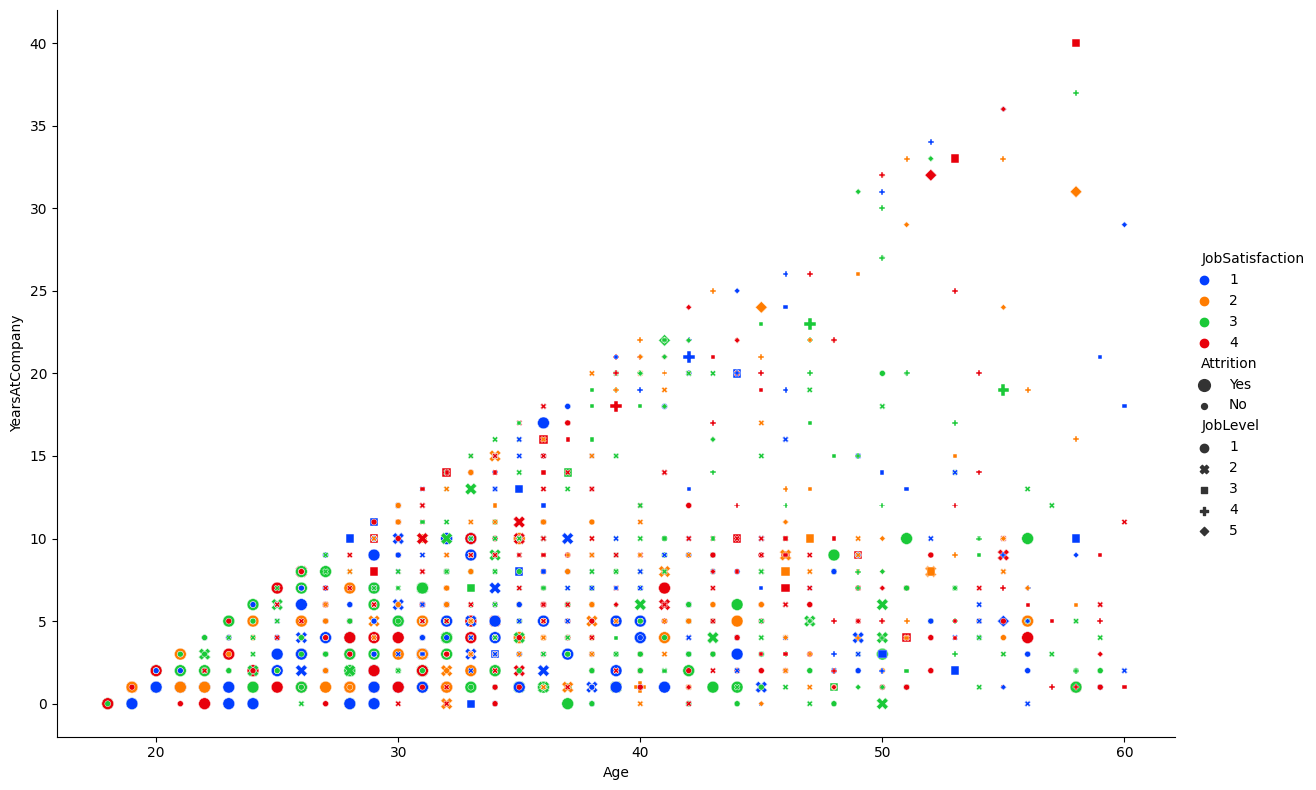

In [76]:
sns.relplot(data = df_HR, x = 'Age', y = 'YearsAtCompany', height = 8, size = 'Attrition', aspect = 1.5,\
           style = 'JobLevel', hue = 'JobSatisfaction', palette = 'bright')

--> the order that relplot parameters are taken is :

# hue-size-style

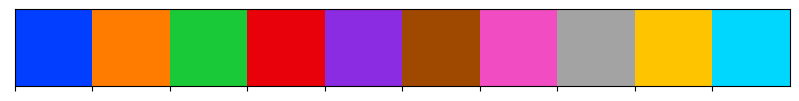

In [77]:
sns.palplot(sns.color_palette('bright')) #shows which are the colors in the palette

# lineplot

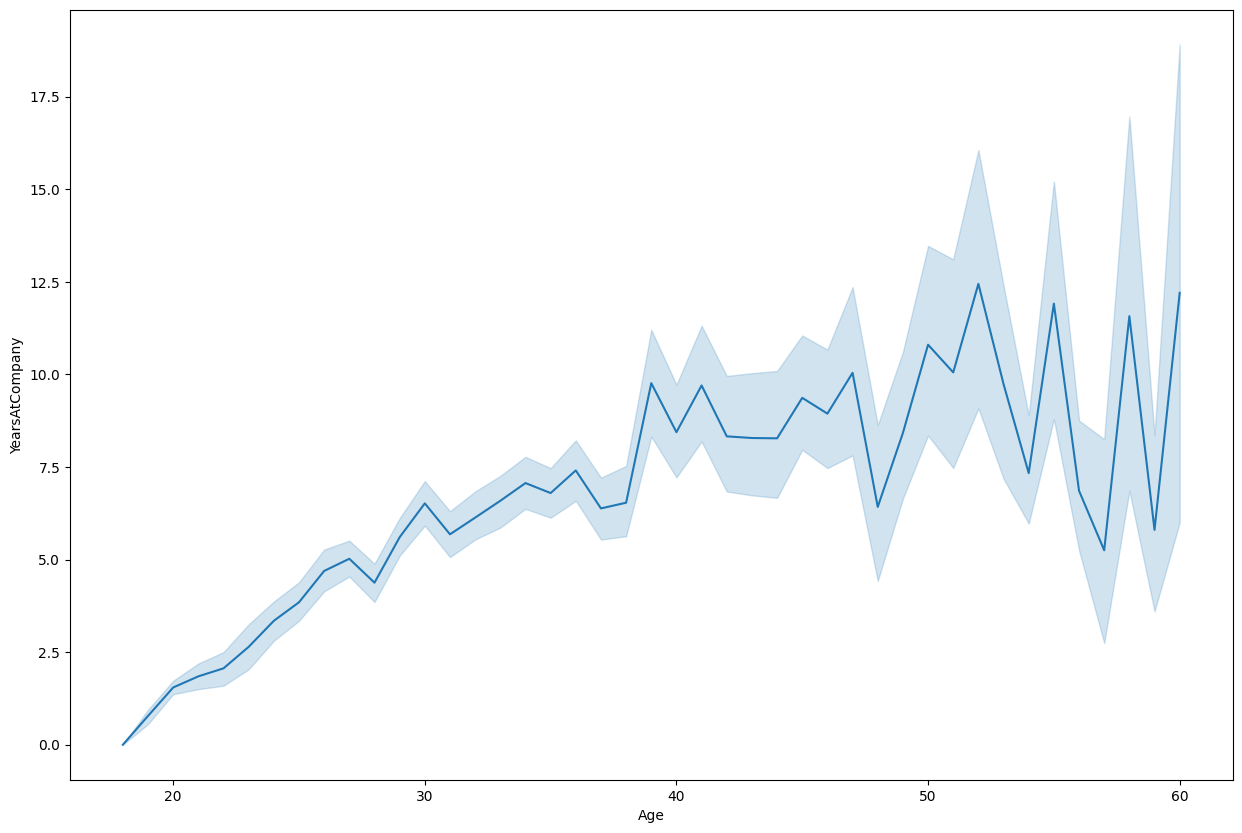

In [86]:
plt.figure(figsize = (15,10))
sns.lineplot(data = df_HR, x = 'Age',y = 'YearsAtCompany')
plt.show()

--> By default, it shows fill between like fill_between in matplotlib.
--> The fill between is like confidence interval that the values are more or lesser in given range. 

--> By increasing the range(60 - 80/ 40 - 90) the confidence interval will increase
--> Decreasing the CI, the range also decreases ( becomes narrower)

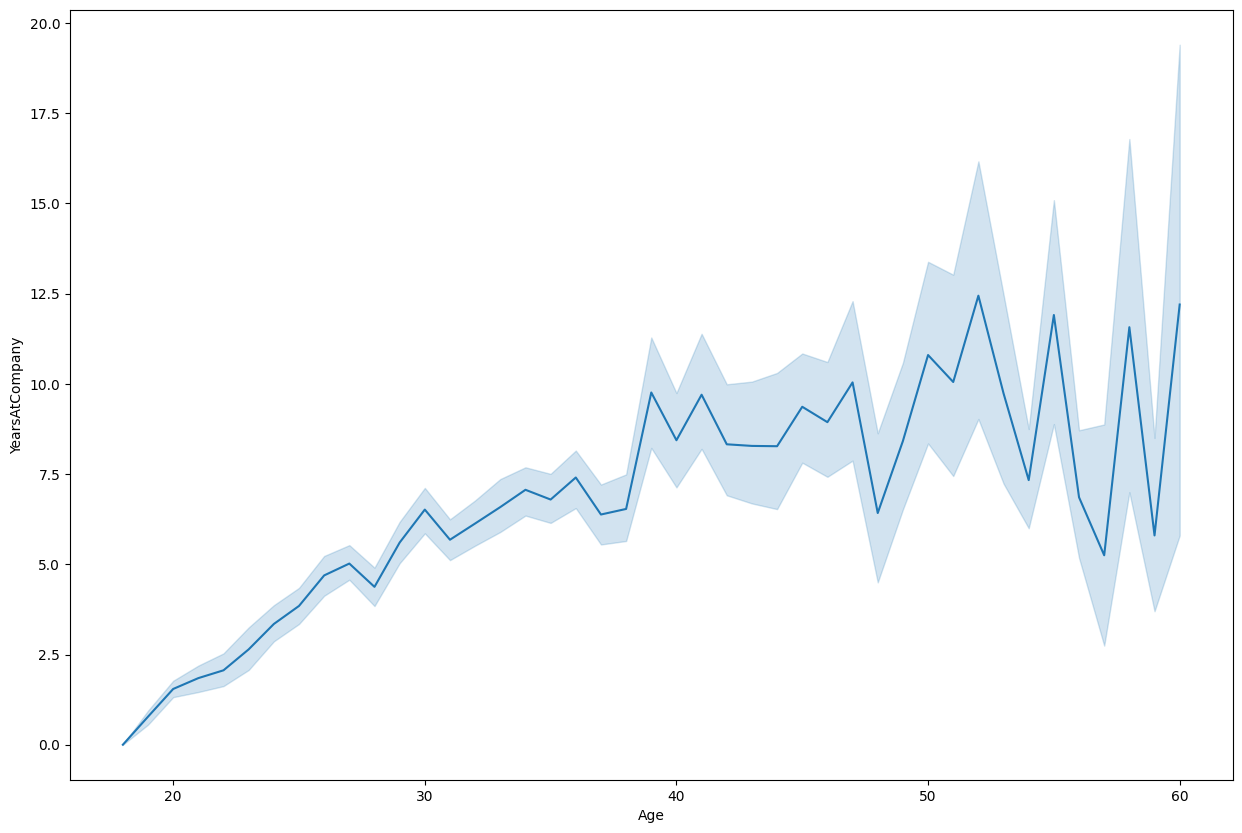

In [85]:
plt.figure(figsize = (15,10))
sns.lineplot(data = df_HR, x = 'Age',y = 'YearsAtCompany',errorbar = ('ci',95))
plt.show()

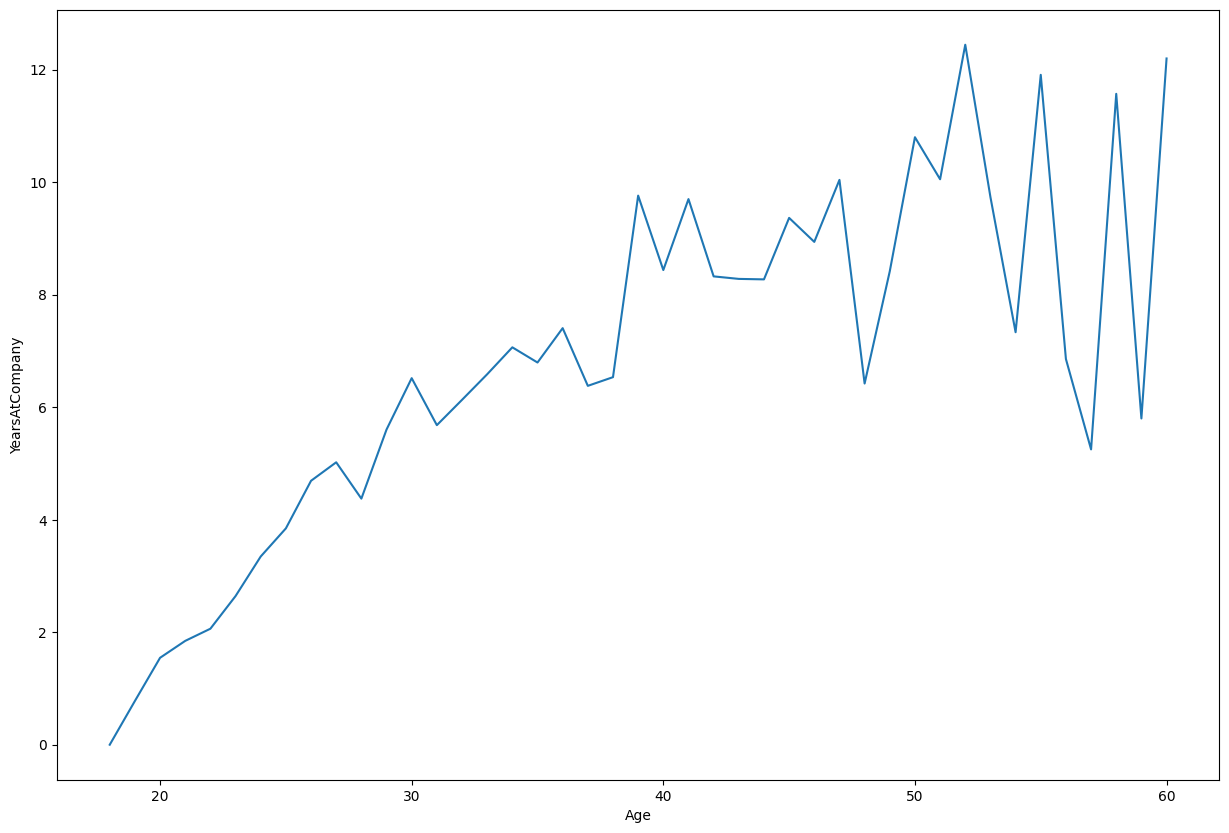

In [87]:
plt.figure(figsize = (15,10))
sns.lineplot(data = df_HR, x = 'Age',y = 'YearsAtCompany',errorbar = None)
plt.show()

<Figure size 1600x1000 with 0 Axes>

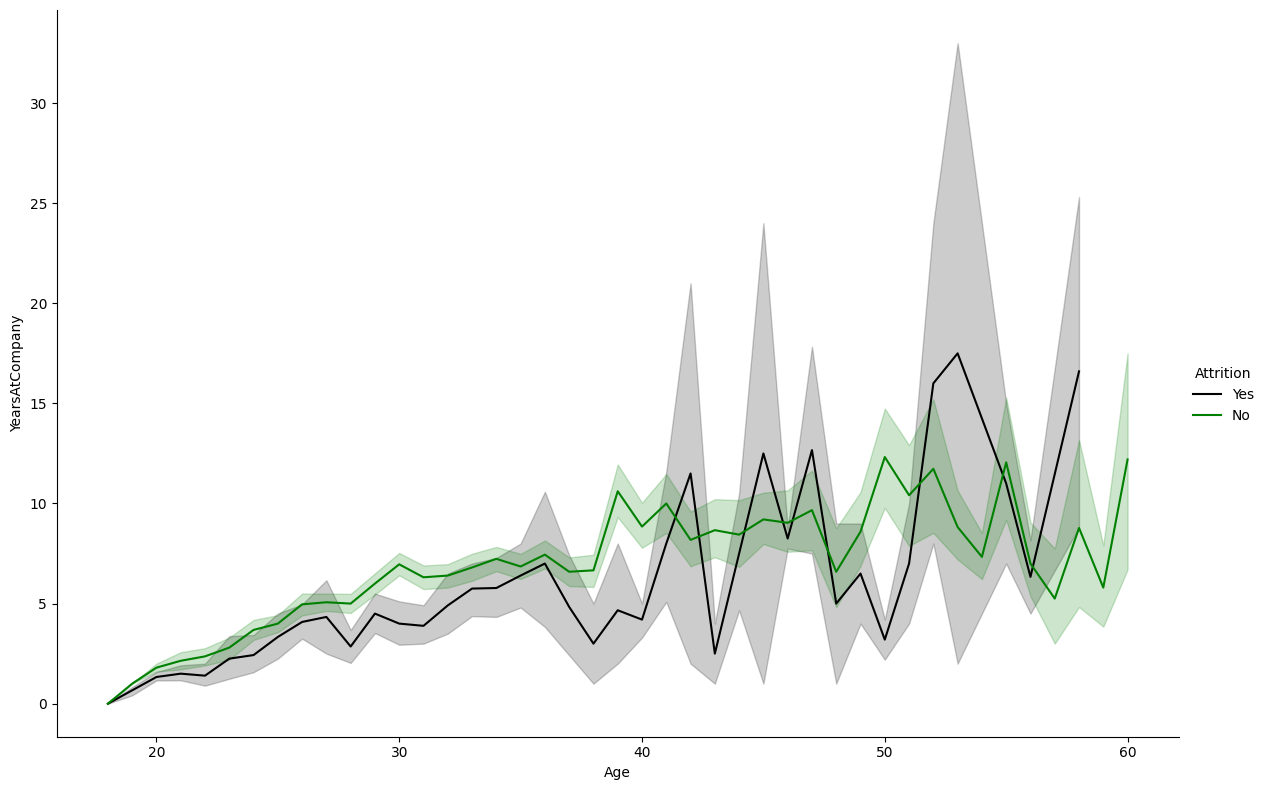

In [94]:
plt.figure(figsize = (16,10))
sns.relplot(data = df_HR, x = 'Age', y = 'YearsAtCompany',hue = 'Attrition', palette = ['black','green'],\
           kind = 'line', height = 8, aspect = 1.5, errorbar = ('ci', 90))
plt.show()
#style or size doesn't come into play here

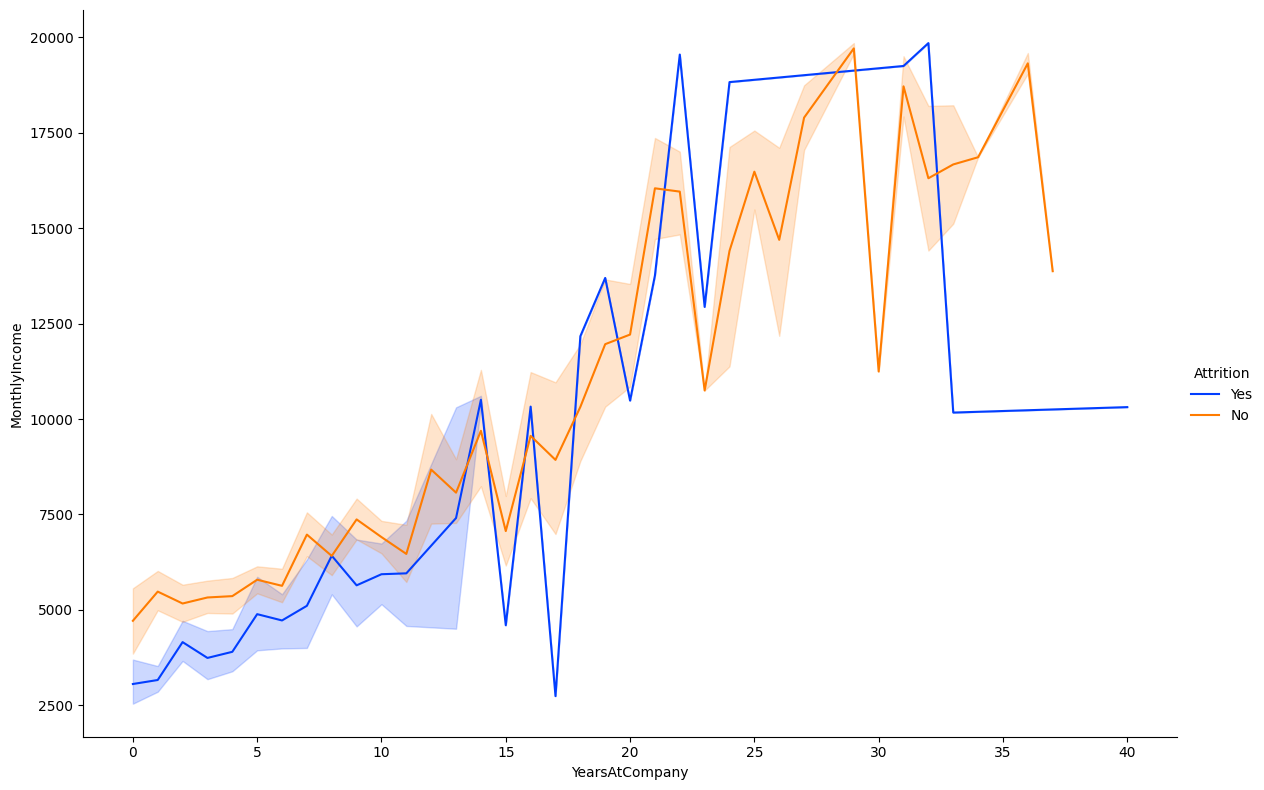

In [95]:
sns.relplot(data = df_HR, x = 'YearsAtCompany', y = 'MonthlyIncome', height = 8, aspect = 1.5, hue = 'Attrition',\
palette = 'bright', kind = 'line', errorbar = ('ci',90))
plt.show()

# lmplot

-- > plots a scatterplot with regression line overlaid

Regression line will always pass through the mean of x and y
--> linear regression line will help predict the price of an area whose price is previously unknown using previous values ( wherever the value falls on regression line) - example 

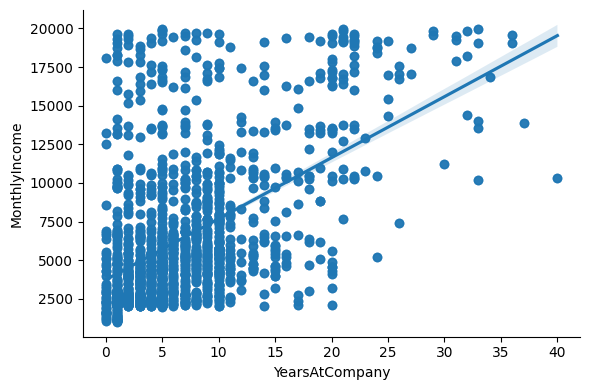

In [97]:
sns.lmplot(data= df_HR, x = 'YearsAtCompany', y ='MonthlyIncome', height = 4, aspect = 1.5, ci = 90)
plt.show()

# scatter first - has to be x, y(to see where the datapoints actually are)

In [98]:
# There will be some variance between what the line predicts and what the value(price of house is)
# The difference is  called residual, the line can't explain
# unless it is a linear relationship, there will be some residual/ resistance 

# to show the residual we have residplot....

<AxesSubplot: xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

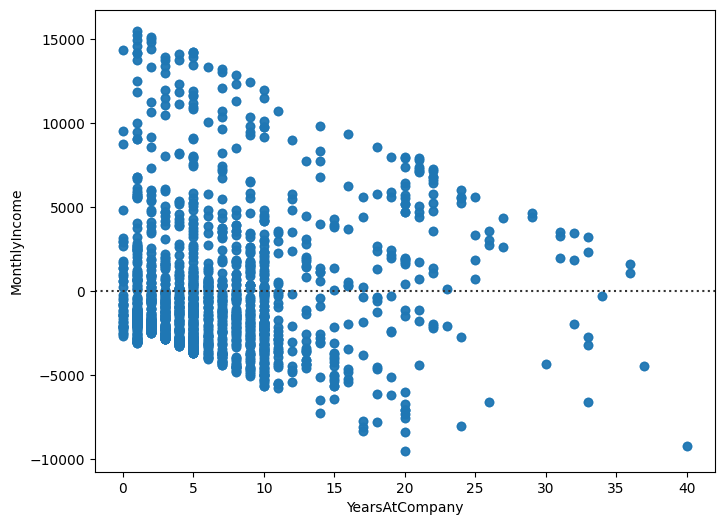

In [100]:
plt.figure(figsize = (8,6))
sns.residplot(data = df_HR, x = 'YearsAtCompany', y = 'MonthlyIncome')

# the actual difference above and below the residual line

In [101]:
df_hr_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [102]:
df_hr_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

# plotting categorical data: 

we using catplot() function to draw the plots of categorical data( one would be categorical)

# catplot

--> by default makes a stripplot( also called jitterplot) showing the points on plot corresponding to x and y axis
--> points are scattered across the y dimension because they are deviating from true x values(jittering) so they don't overlap completely. 
  If we set the jitter to false, then they will be plotted on true x and will only be one point for every y point on x tick 

In [116]:
sns.catplot(x = 'Attrition', y = 'YearsAtCompany', data = df_HR, jitter = True, set_palette('blue','orange'))
plt.show()

SyntaxError: positional argument follows keyword argument (1767145092.py, line 1)

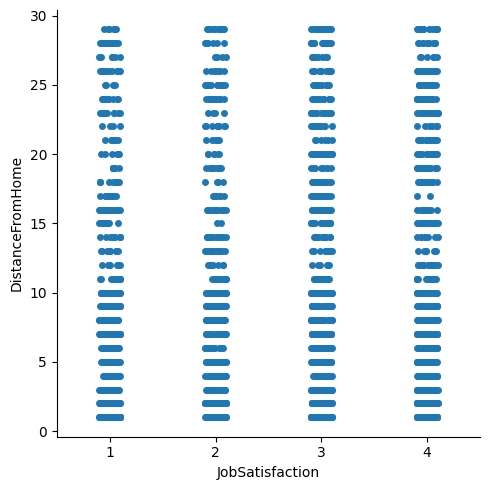

In [139]:
sns.catplot(x = 'JobSatisfaction', y = 'DistanceFromHome', data = df_HR, jitter = True)
plt.show()

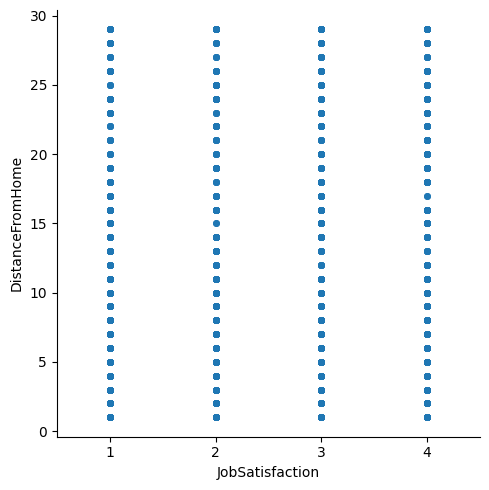

In [110]:
sns.catplot(x = 'JobSatisfaction', y = 'DistanceFromHome', data = df_HR, jitter = False)
plt.show()

# how to include colors for catplot

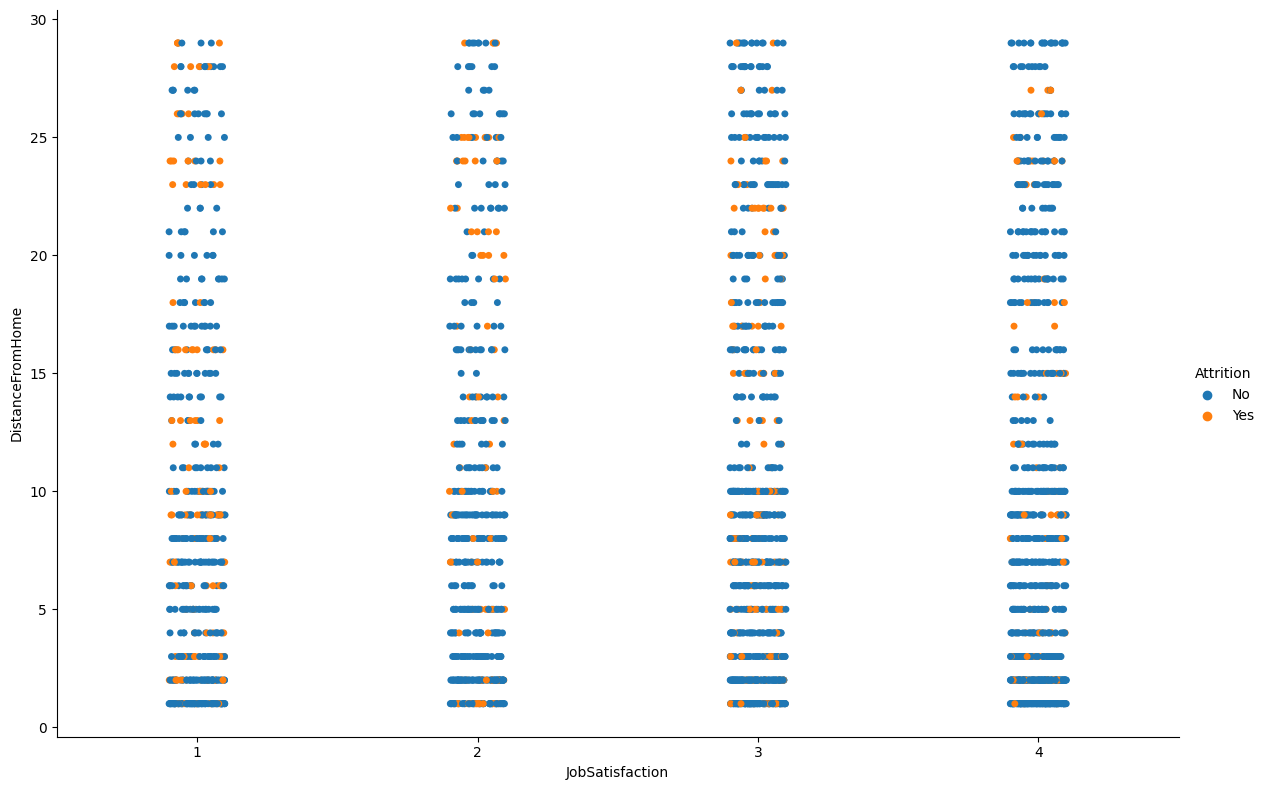

In [117]:
sns.catplot(x = 'JobSatisfaction', y = 'DistanceFromHome', data = df_HR, kind = 'strip', height = 8, aspect = 1.5\
           , hue = 'Attrition')
plt.show()

/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  y = x
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  y = x
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 39.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  y = x
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 41.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  y = x
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.

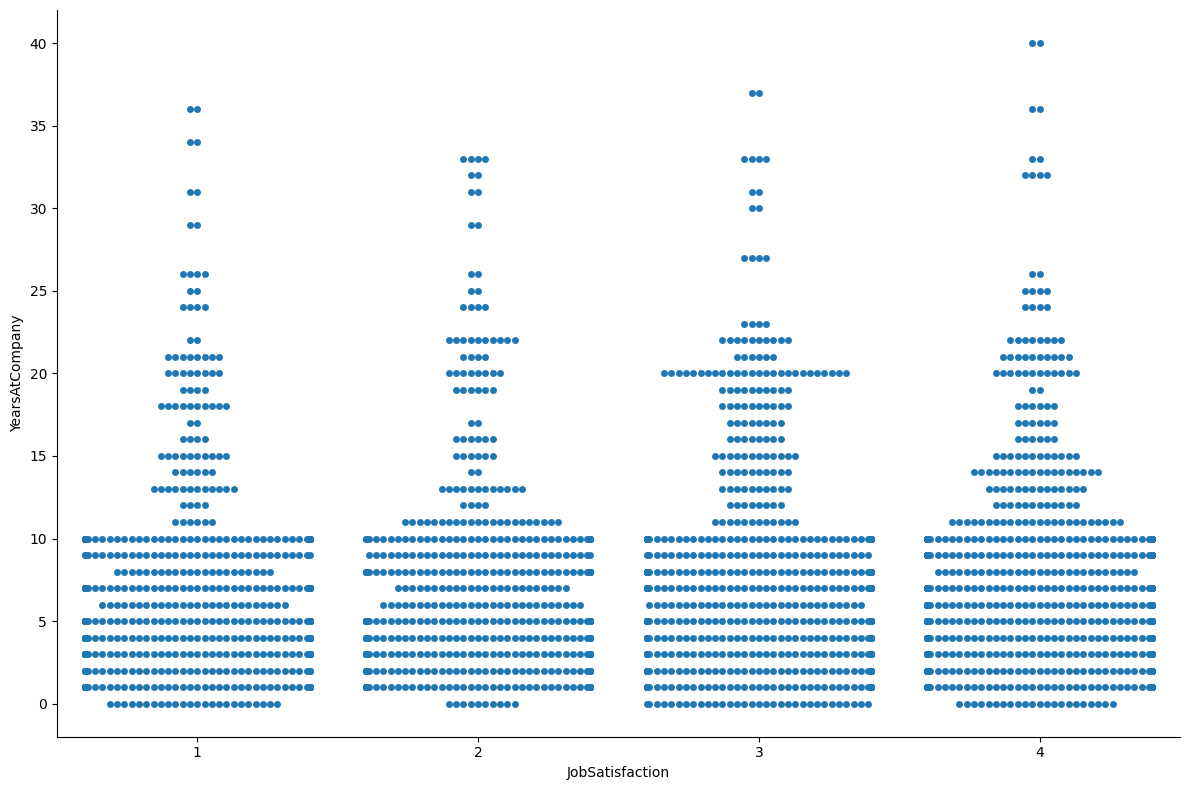

In [126]:
sns.catplot(x = 'JobSatisfaction', y = 'YearsAtCompany', data = df_HR, kind = 'swarm', height = 8, aspect = 1.5)
plt.show()

# each of the value is plotted as point. one drawback is if we have more datapoints and if it reaches end of its
# space, it plots them as single data point, basically to mean there are more datapoints that could not be plotted

# the warnings are exactly mentioning that


/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  y = x
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  y = x
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 39.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  y = x
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 41.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  y = x
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.

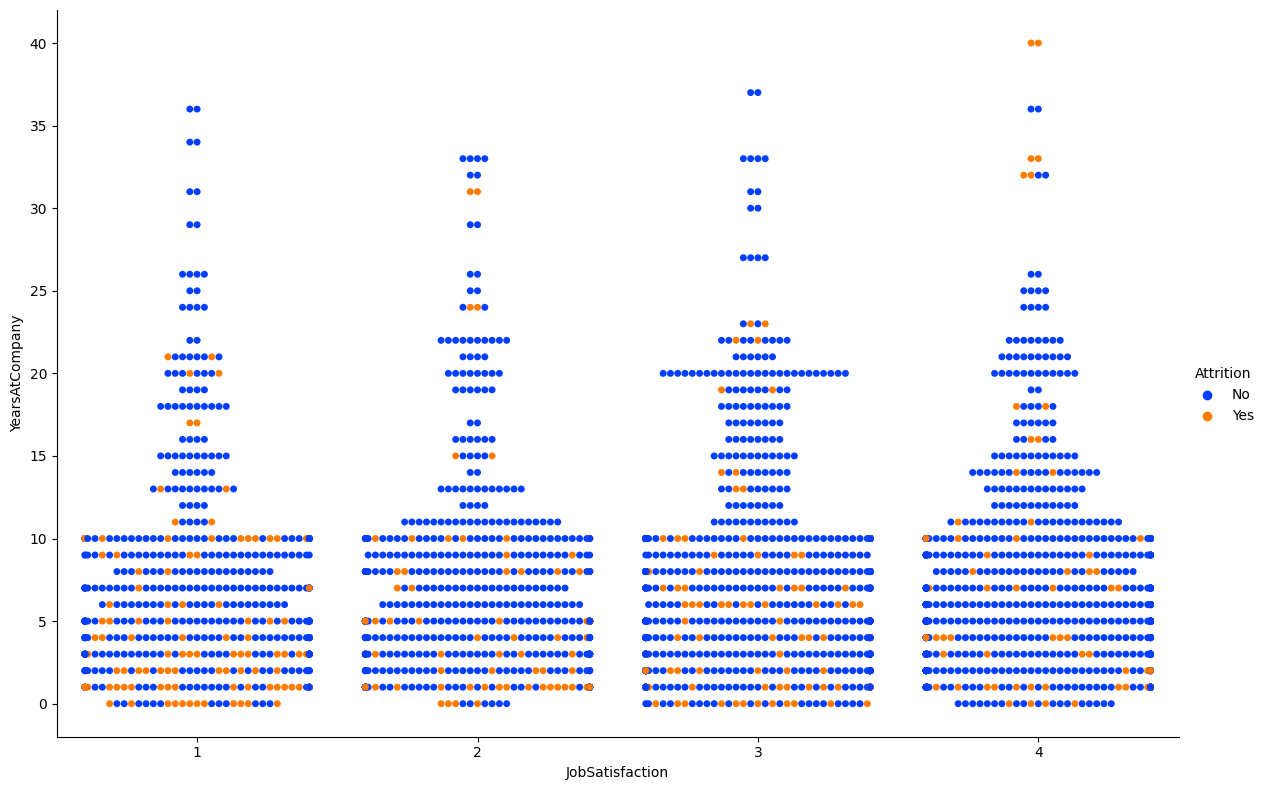

In [127]:
sns.catplot(x = 'JobSatisfaction', y = 'YearsAtCompany', data = df_HR, kind = 'swarm', height = 8, aspect = 1.5\
           , hue = 'Attrition',palette = 'bright')
plt.show()

# each of the value is plotted as point. one drawback is if we have more datapoints and if it reaches end of its
# space, it plots them as single data point, basically to mean there are more datapoints that could not be plotted

# the warnings are exactly mentioning that


--> To delete outliers of the datapoints, one way to do it is
LL: 25th percentile - (1.5)IQR
UL: 75th percentile + (1.5)IQR

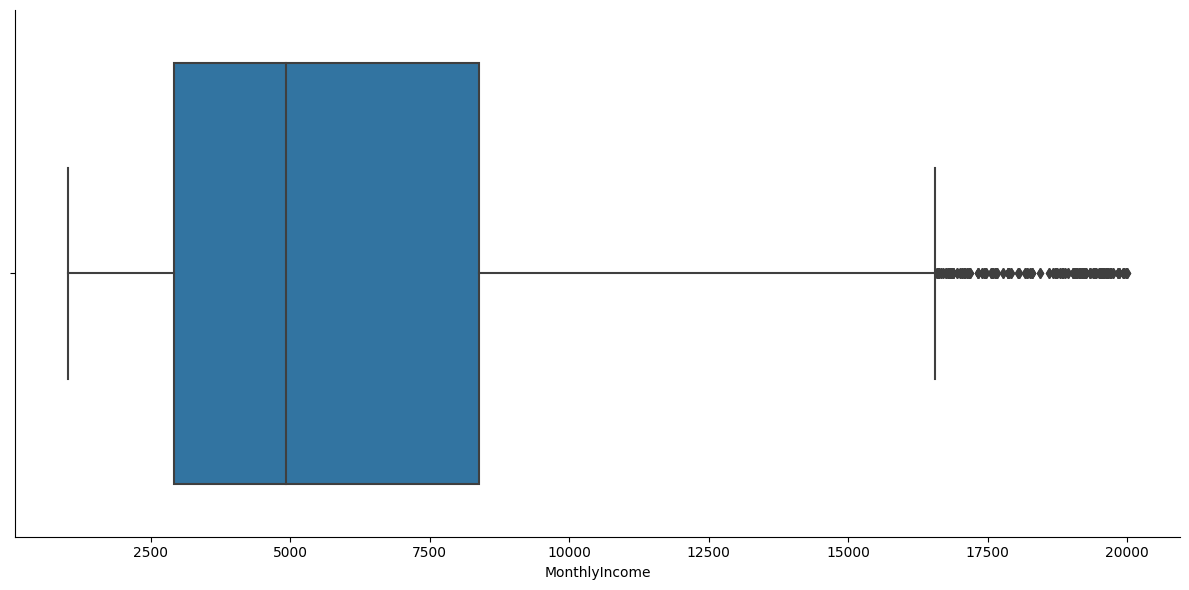

In [128]:
sns.catplot(x = "MonthlyIncome", data = df_HR, kind = 'box', height = 6, aspect = 2)
plt.show()

# violin plot: 

--> The violin plot combines the boxplot and the distribution of values at quartiles(kernal density estimation procedure) -- This is to provide a richer description of distribution of values. 

--> The quartile values are displayed inside the violin

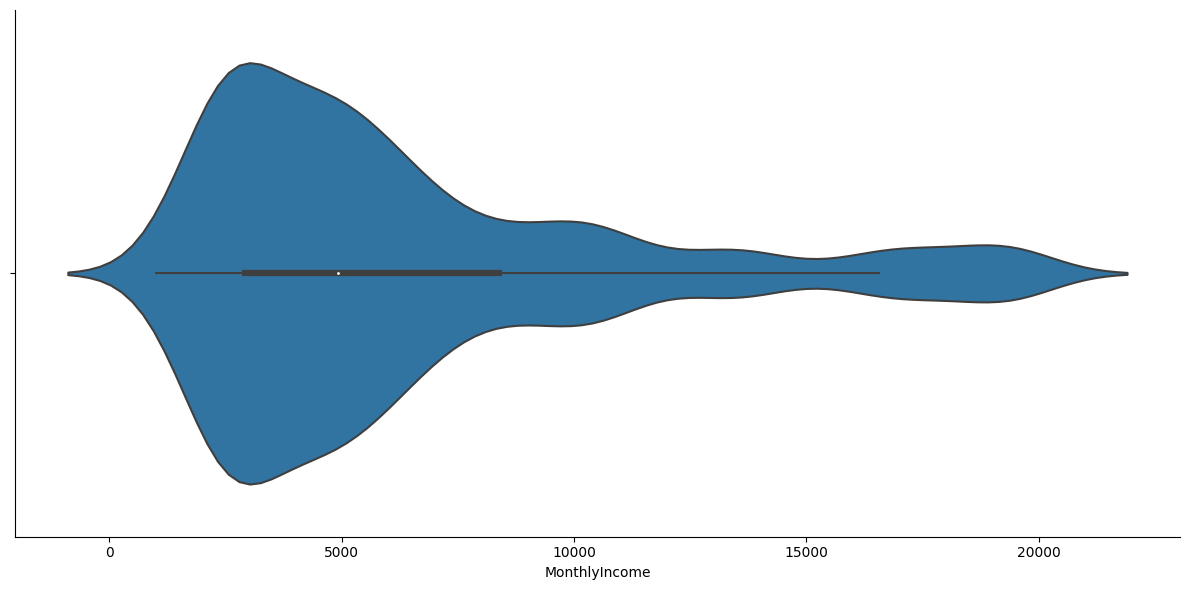

In [129]:
sns.catplot(x = "MonthlyIncome", data = df_HR, kind = 'violin', height = 6, aspect = 2)
plt.show()

# the bottom part is just a mirror of the top part. 

/var/folders/01/wbf4q7254sg4vtt9f05q1z8r0000gn/T/ipykernel_12464/755455436.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(y = 'DistanceFromHome', x = "JobSatisfaction", data = df_HR, palette = 'bright')
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  y = x
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  y = x
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  y = x
/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packag

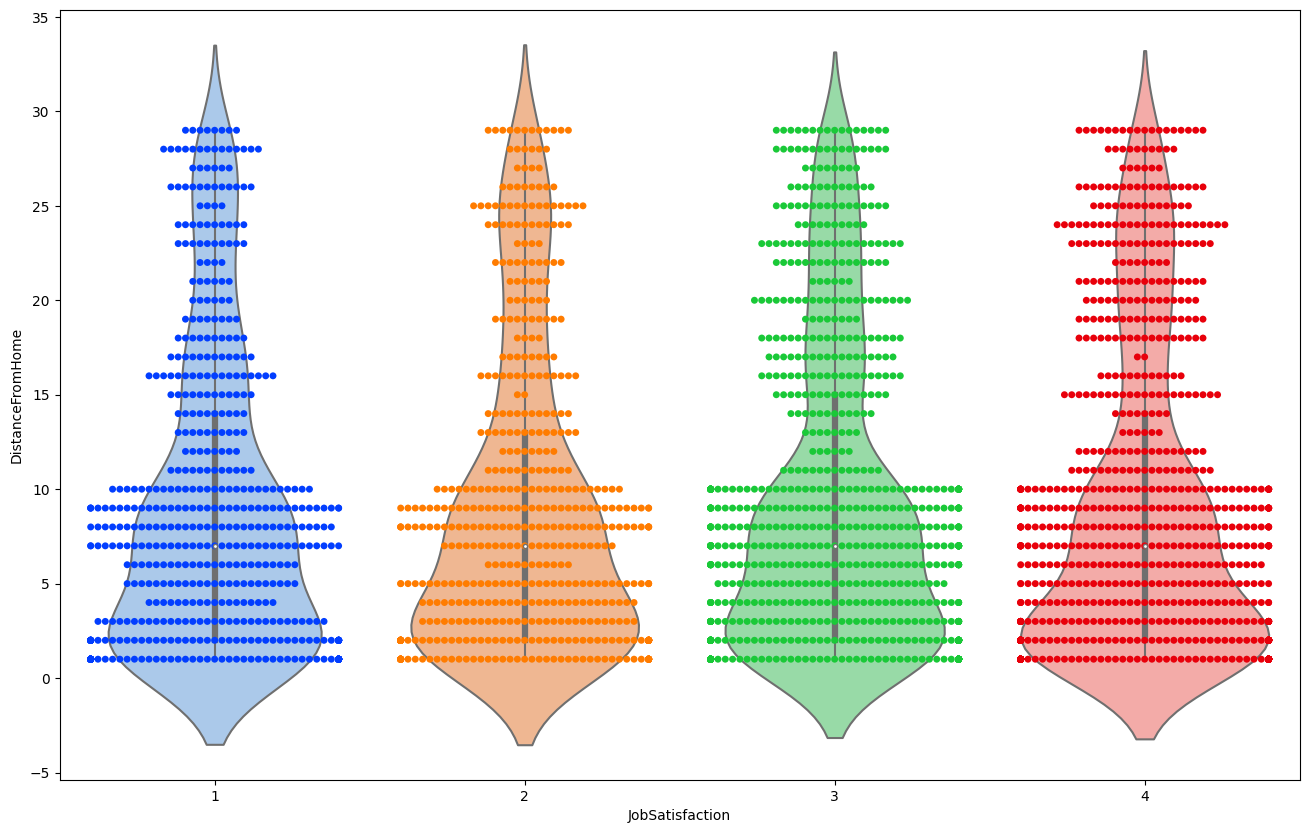

In [130]:
plt.figure(figsize = (16,10))
sns.swarmplot(y = 'DistanceFromHome', x = "JobSatisfaction", data = df_HR, palette = 'bright')
sns.violinplot(y = 'DistanceFromHome', x = "JobSatisfaction", data = df_HR, palette = 'pastel')
plt.show()

--> When the hue parameter has only two levels, we can also split the violin.

--> Below, we are adding a 'hue' parameter ( "attrition") with two levels. and we get 8 violin plots instead of 
4 as default. 

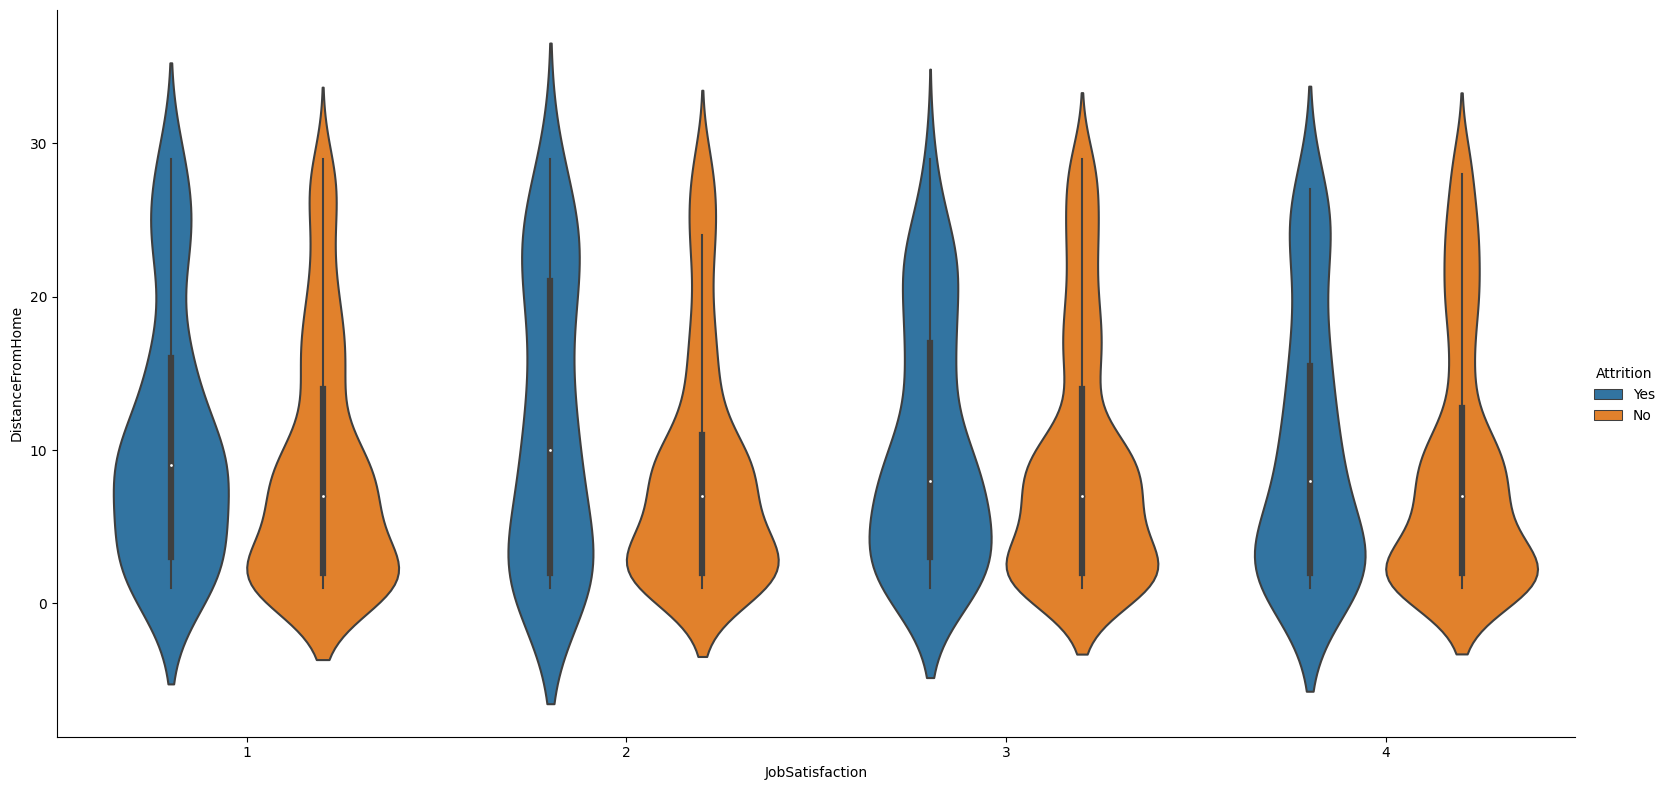

In [131]:
sns.catplot(y = 'DistanceFromHome', x = "JobSatisfaction", hue = 'Attrition', data = df_HR,kind = 'violin',\
            height = 8, aspect = 2)
plt.show()


--> Only works when hue parameter is binary nominal variable(with two values)
By setting the split parameter to True, we get the distributions of attrition-yes, attrition-no on both sides of the plot

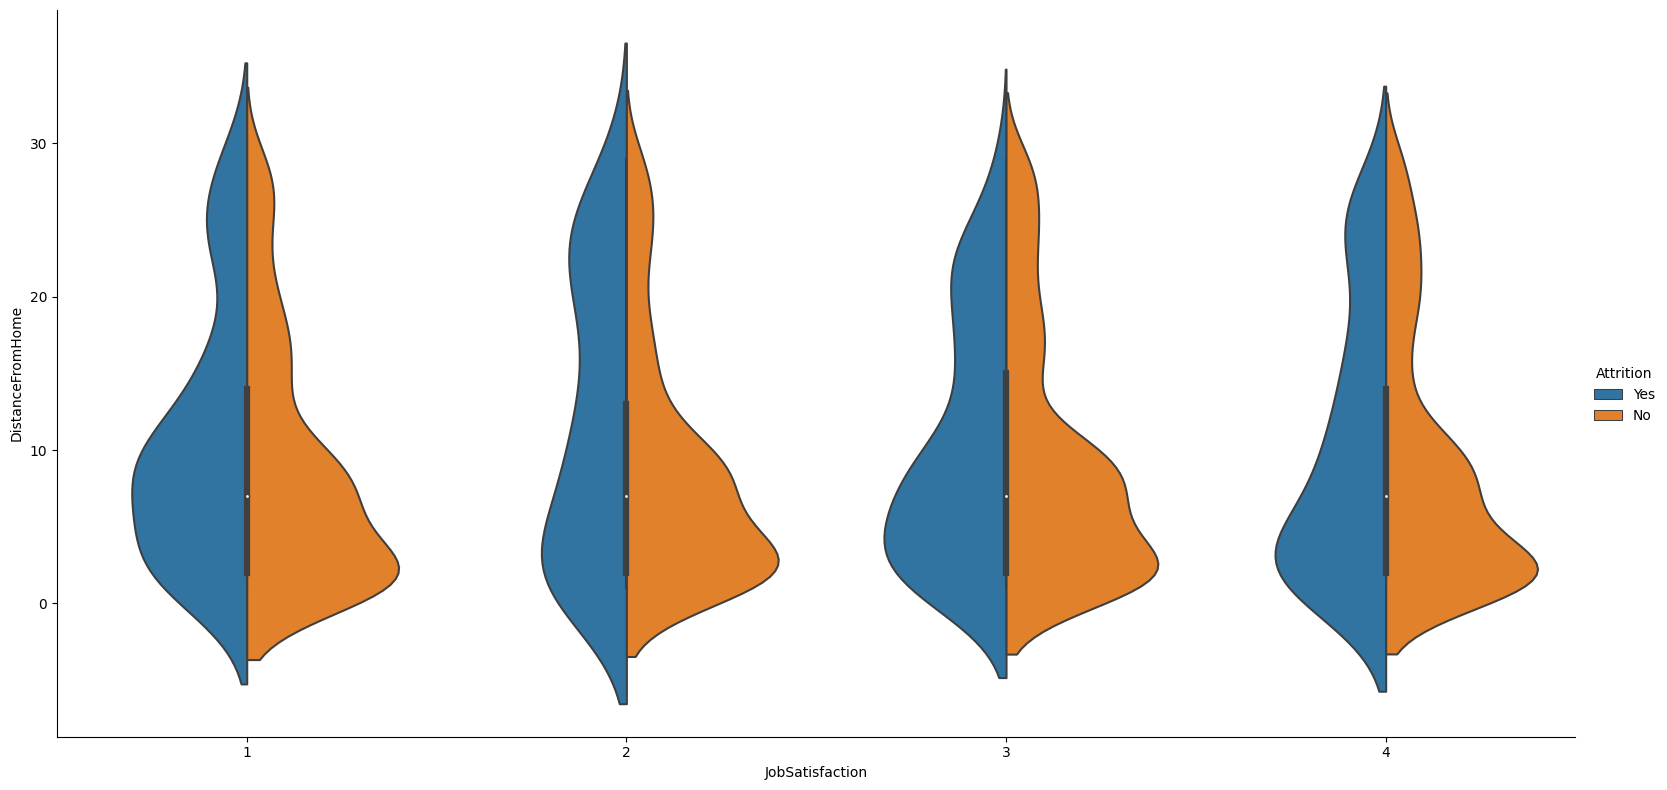

In [132]:
sns.catplot(y = 'DistanceFromHome', x = "JobSatisfaction", hue = 'Attrition', data = df_HR,kind = 'violin',\
            height = 8, aspect = 2,split = True)
plt.show()
# hue is seperated left and right for same violin instead of two 
# has same boxplot

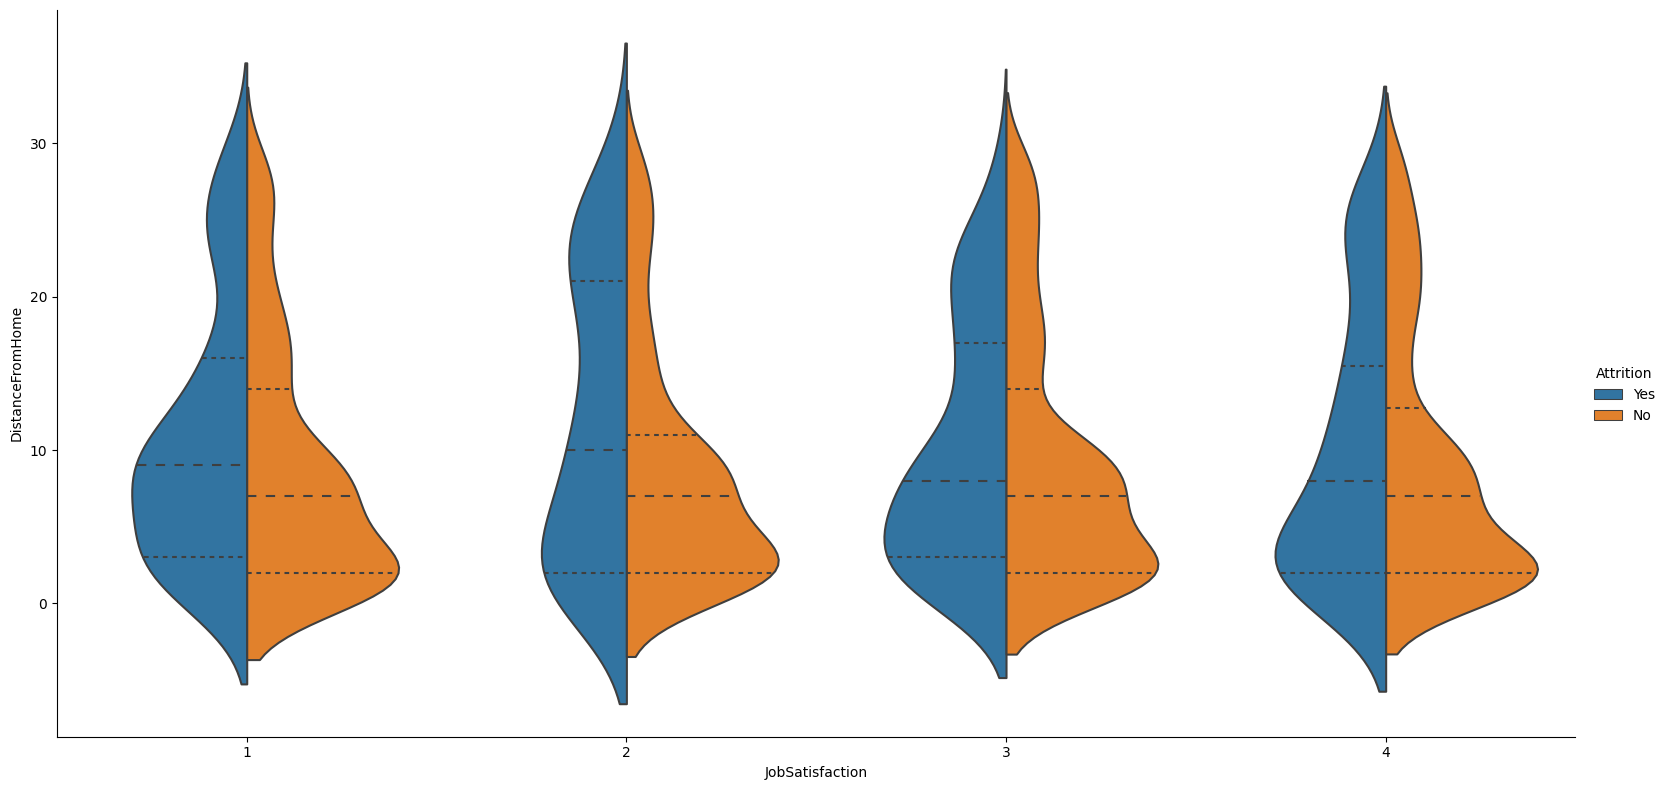

In [133]:
sns.catplot(y = 'DistanceFromHome', x = "JobSatisfaction", hue = 'Attrition', data = df_HR,kind = 'violin',\
            height = 8, aspect = 2,split = True,inner = 'quartile')
plt.show()

# clearly shows the IQR for both with and without attrition 

# pointplot

--> It can tell how the data is evolving. Takes the mean of data(of given two variables) and joins up the means. 

--> connects the data from same hue category. This helps in identifying how the relationship is changing in a particular hue category. 

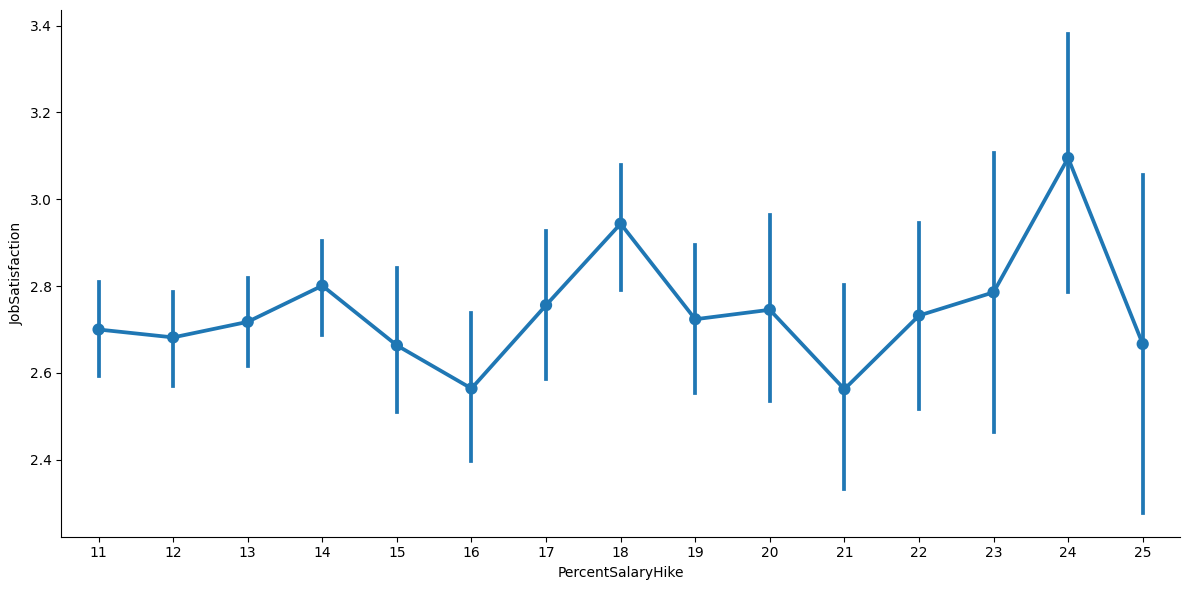

In [134]:
sns.catplot(x = 'PercentSalaryHike', y = 'JobSatisfaction', data = df_HR, kind = 'point', height = 6, aspect = 2)
plt.show()

# The people who got 15, 16 are unhappy since they might have expected more than 20 percent

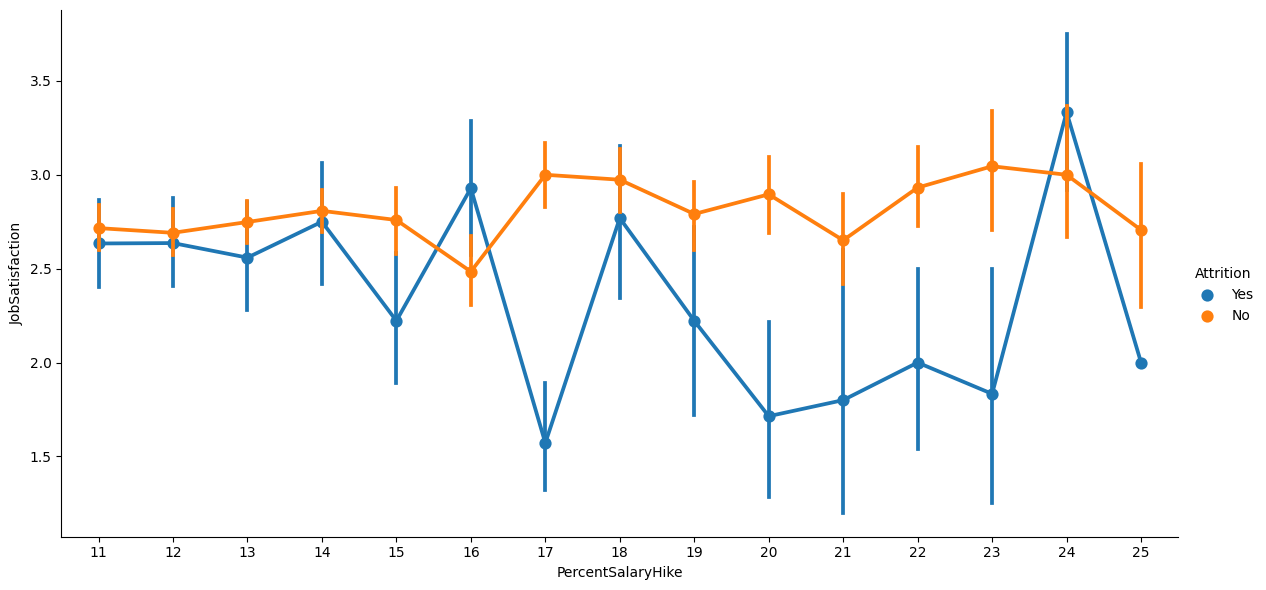

In [136]:
sns.catplot(x = 'PercentSalaryHike', y = 'JobSatisfaction', data = df_HR, kind = 'point', height = 6, aspect = 2,\
           hue = 'Attrition')
plt.show()

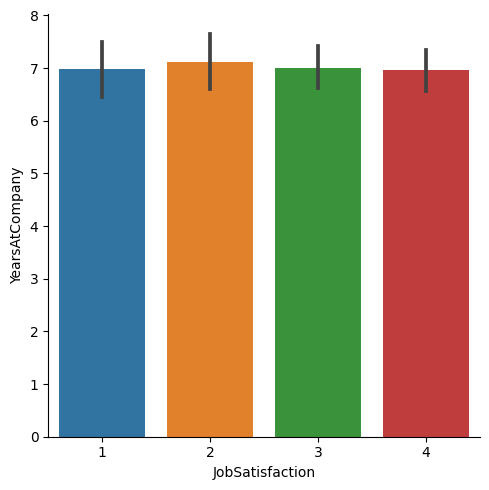

In [138]:
sns.catplot(x = 'JobSatisfaction',y= 'YearsAtCompany', data = df_HR, kind = 'bar')
plt.show()

# THIS SHOWS MEAN OF Y ALONG X AXIS--- shows years at company makes no difference for jobsatisfaction

In [ ]:
sns.catplot(x = 'JobSatisfaction',y= 'YearsAtCompany', data = df_HR, kind = 'bar')
plt.show()

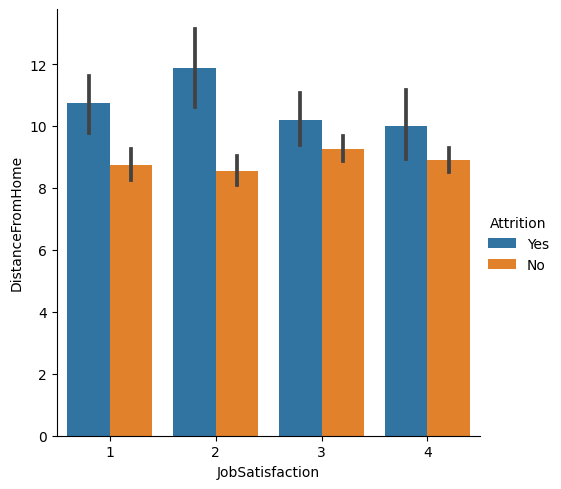

In [142]:
sns.catplot(x = 'JobSatisfaction', y = 'DistanceFromHome', hue = 'Attrition', data = df_HR, kind = 'bar',\
            errorbar = ('ci', 80))
plt.show()

# countplot

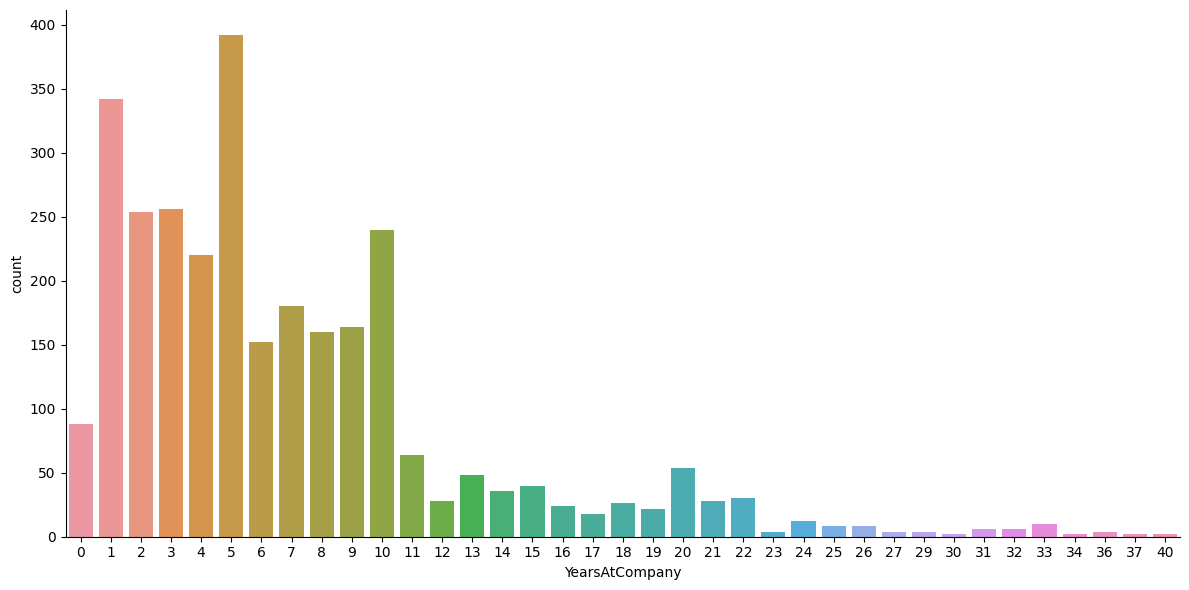

In [146]:
# countplot gives count on one axis, not the mean

sns.catplot(x = 'YearsAtCompany',data = df_HR, kind = 'count', height = 6, aspect = 2)
plt.show()

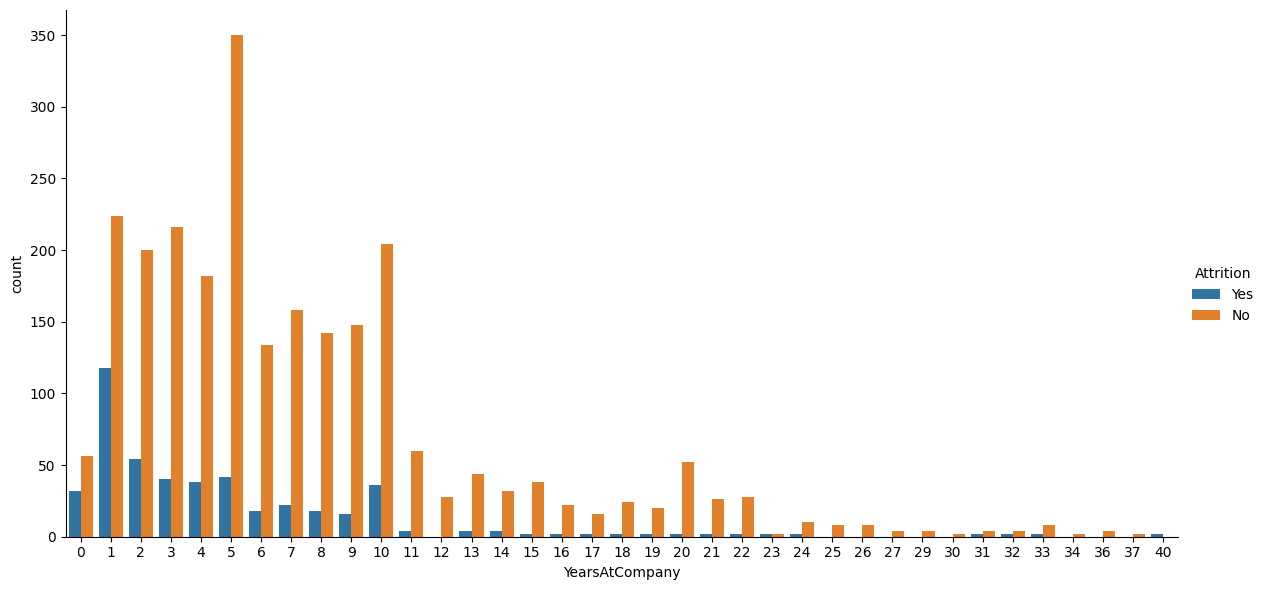

In [148]:
sns.catplot(x = 'YearsAtCompany',data = df_HR, kind = 'count', height = 6, aspect = 2, hue = 'Attrition')
plt.show()

/Users/hemakarnam/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  self.fig.tight_layout()


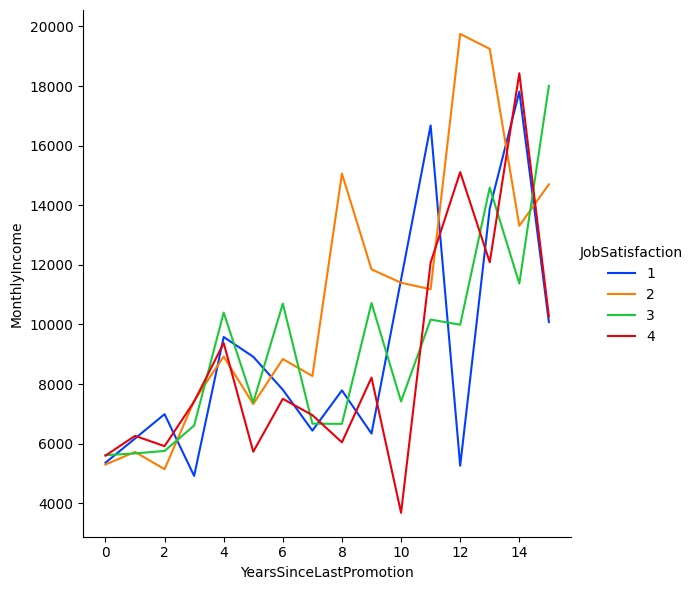

In [155]:
# using hue

sns.relplot(data = df_HR, x = 'YearsSinceLastPromotion', y = 'MonthlyIncome', hue = 'JobSatisfaction',
            palette= 'bright', kind = 'line', height = 6, aspect = 1, ci= None)
plt.show()

--> To get higher dimensional charts( have deeper insight/ go more deep into the data) we have these parameters -- 

# hue 
# size
# style

--> There is one more called 'col'
 - In hue- it shows all data in single graph
 
 # col
 
 --> col shows the data seperated with a feature in different graphs( each level on seperate graphs) 
 

/var/folders/01/wbf4q7254sg4vtt9f05q1z8r0000gn/T/ipykernel_12464/3808430224.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(data = df_HR, x = 'YearsSinceLastPromotion', y = 'MonthlyIncome', col = 'JobSatisfaction',


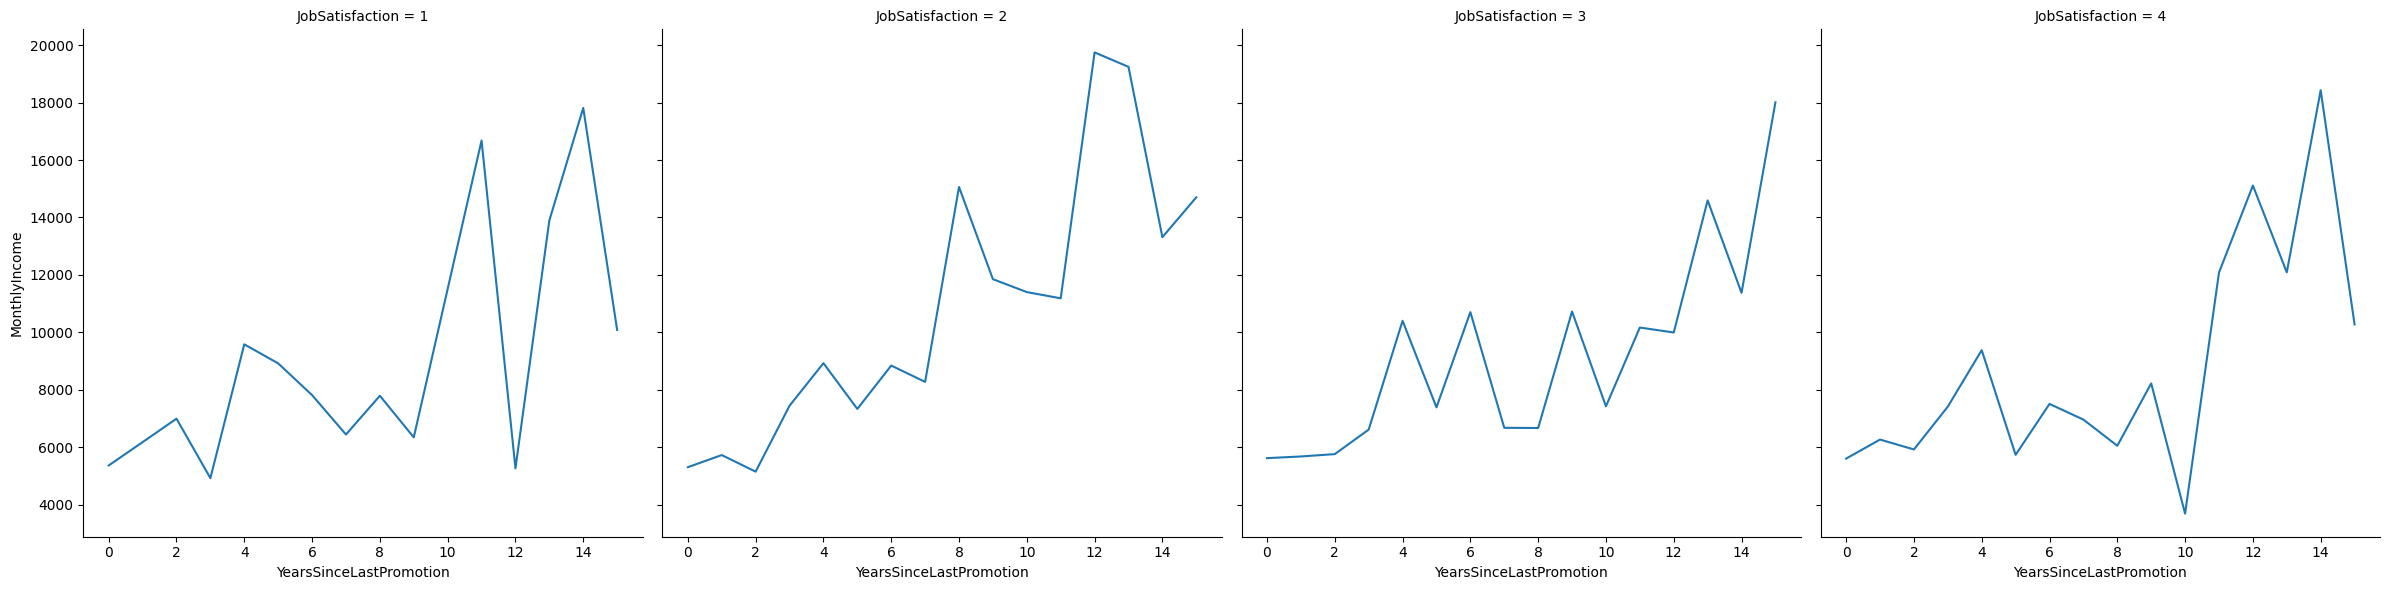

In [157]:
# using col

sns.relplot(data = df_HR, x = 'YearsSinceLastPromotion', y = 'MonthlyIncome', col = 'JobSatisfaction',
            palette= 'bright', kind = 'line', height = 6, aspect = 1, errorbar= None)
plt.show()

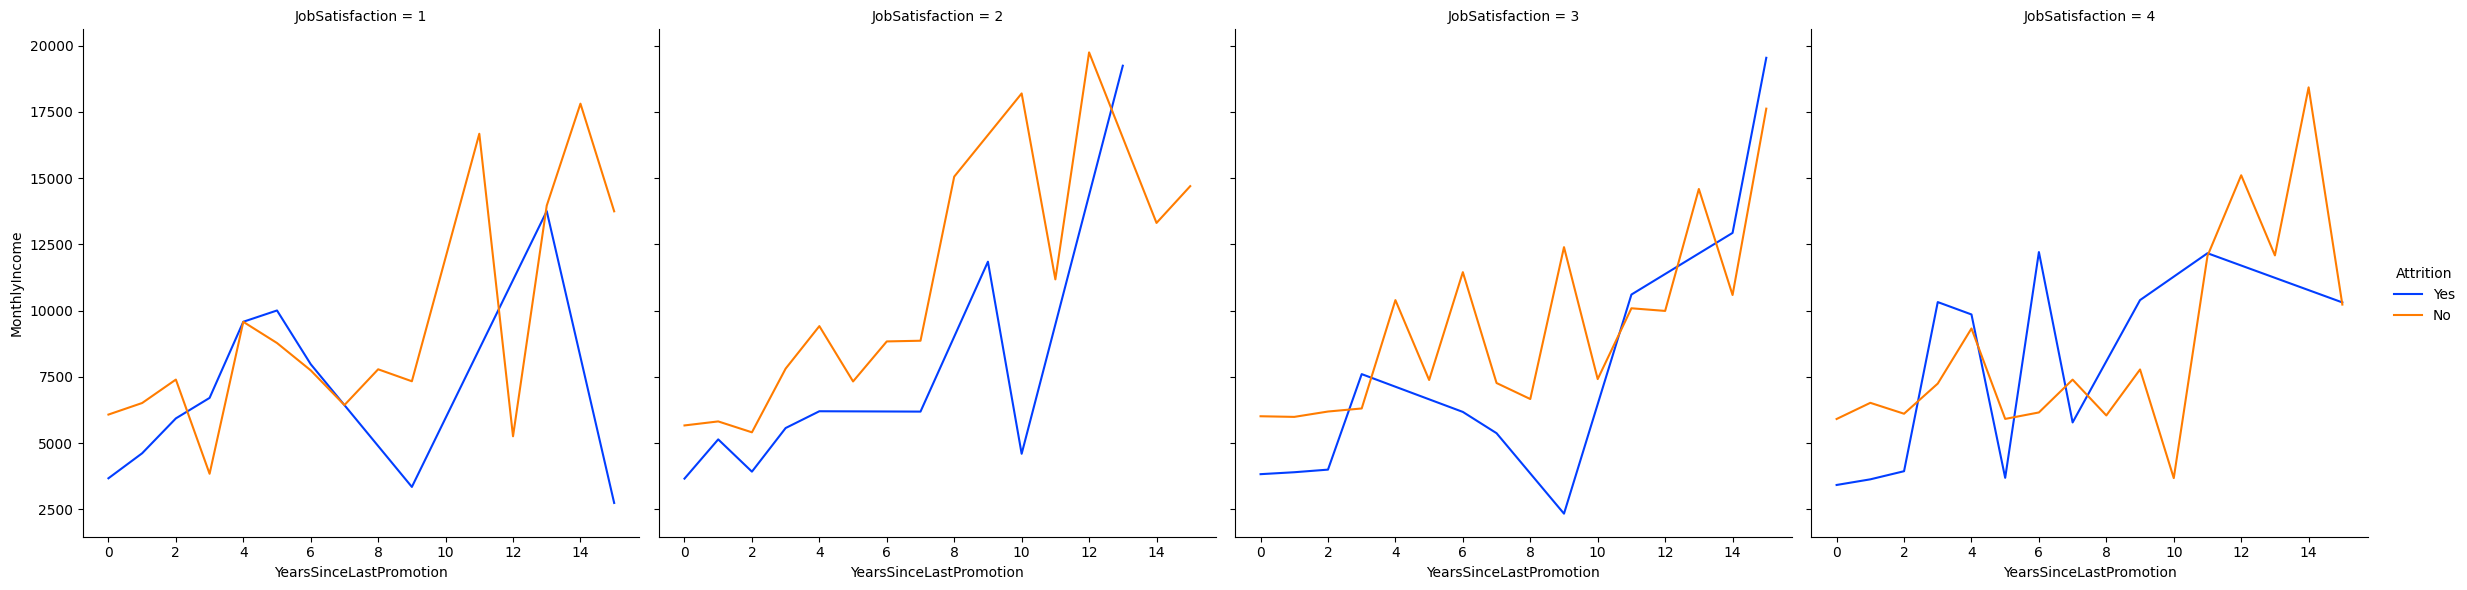

In [156]:
#both hue and col together

sns.relplot(data = df_HR, x = 'YearsSinceLastPromotion', y = 'MonthlyIncome', col = 'JobSatisfaction', hue='Attrition',
            palette= 'bright', kind = 'line', height = 6, aspect = 1, errorbar= None)
plt.show()

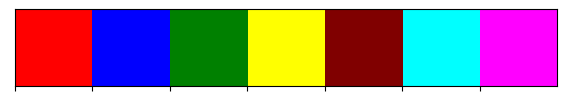

In [159]:
# just to see how different color palettes look
sns.palplot(['red','blue','green','yellow','maroon','cyan','magenta'])

In [160]:
import seaborn as sns

palettePastel = sns.color_palette('pastel')
paletteDeep = sns.color_palette('deep')
paletteSet2 = sns.color_palette('Set2')
paletteMako = sns.color_palette('mako')
paletteMakoSeq = sns.color_palette("mako", as_cmap=True)

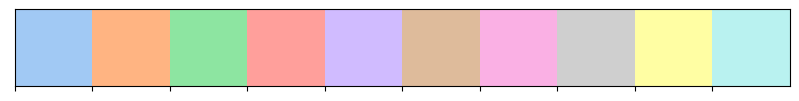

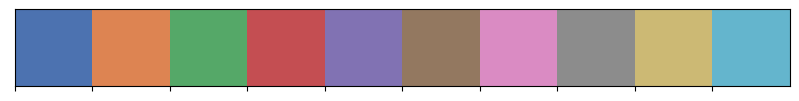

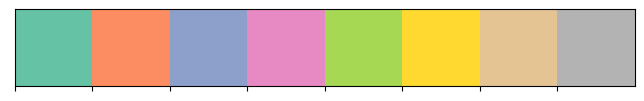

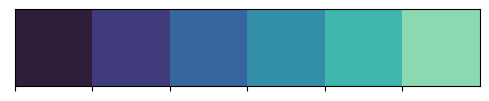

In [161]:
sns.palplot(palettePastel)
sns.palplot(paletteDeep)
sns.palplot(paletteSet2)
sns.palplot(paletteMako)
#sns.palplot(paletteMakoSeq)

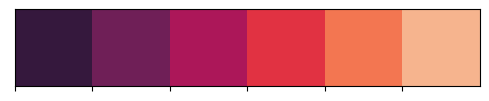

In [162]:
sns.palplot(sns.color_palette('rocket'))

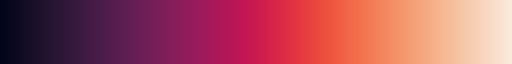

In [164]:
sns.color_palette('rocket', as_cmap = True)
# for gradual shading-usually darker to lighter ( purple but gradually converted to salmon)

# this will come in handy when we do heatmaps

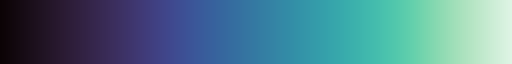

In [165]:
sns.color_palette('mako', as_cmap = True)

# univariate distributions - Histograms

visualizing the distribution of single variable

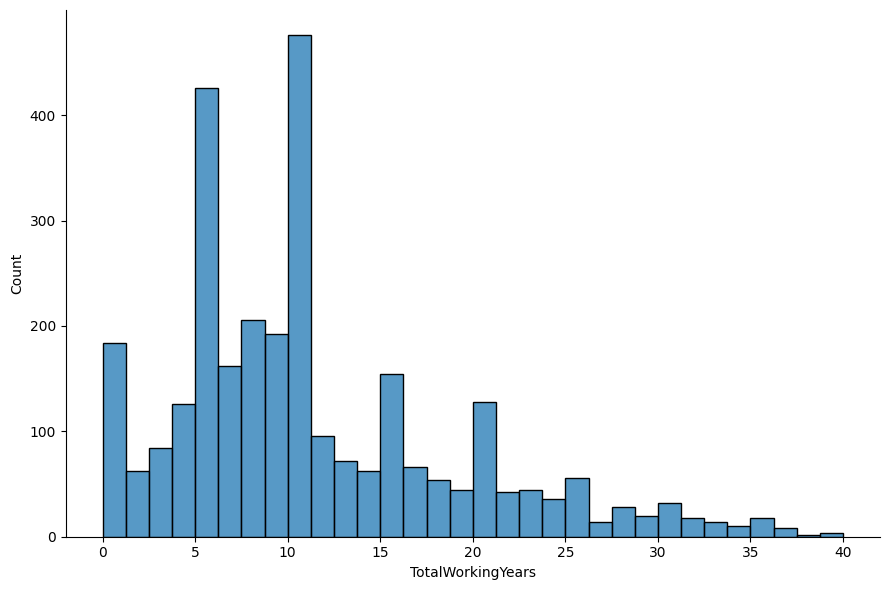

In [172]:
sns.displot(data = df_HR, x = 'TotalWorkingYears',height = 6, aspect = 1.5)
# sns.histplot(data = df_HR,x = 'TotalWorkingYears')
# sns.displot(kind = 'hist', data = df_HR, x = 'TotalWorkingYears')

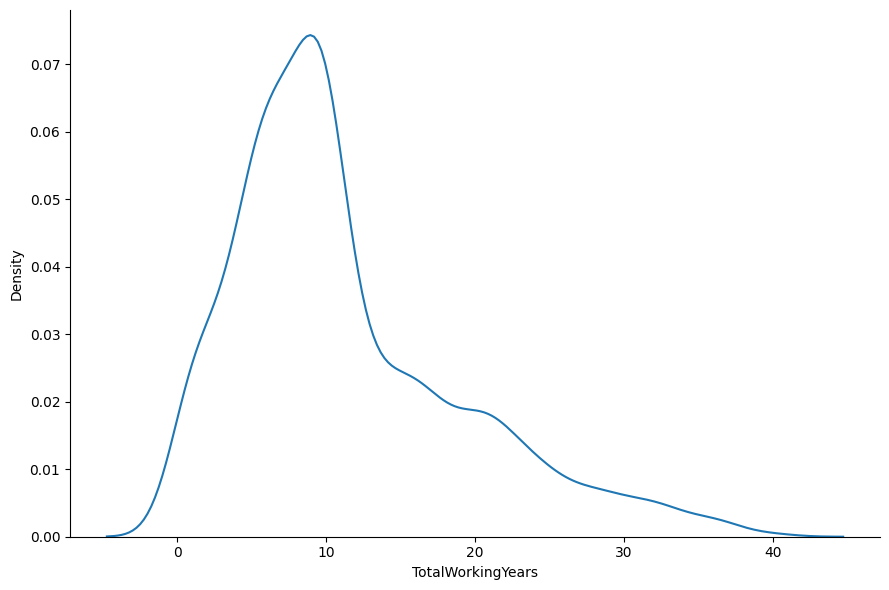

In [173]:
# kde = kernel density estimator - its the distribution now, not the counts

sns.displot(data = df_HR, x = 'TotalWorkingYears',height = 6, aspect = 1.5, kind = 'kde')

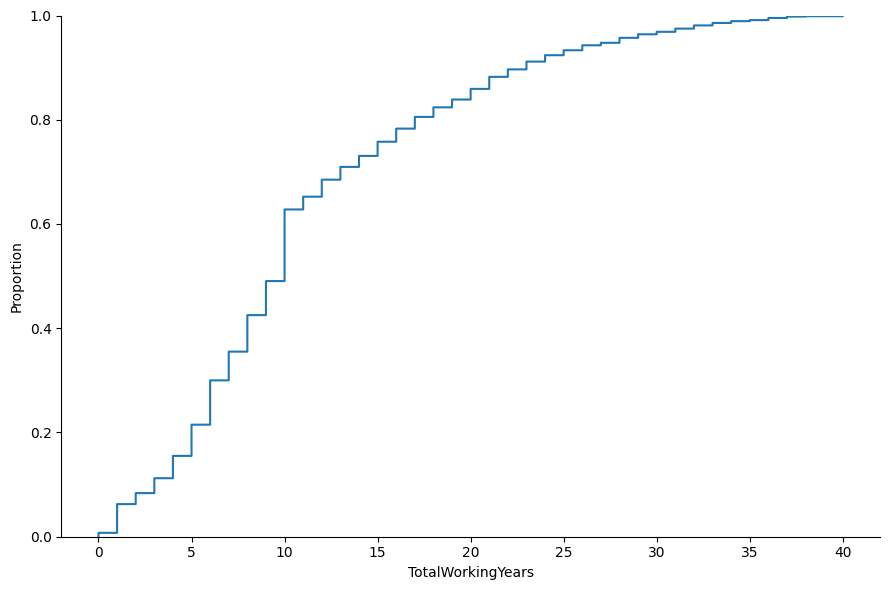

In [174]:
# ecdf - for visualizing each of the datapoints in a cumulative manner - adding to the previous value 
# finally comes to 1 

sns.displot(data = df_HR, x = 'TotalWorkingYears',height = 6, aspect = 1.5, kind = 'ecdf')

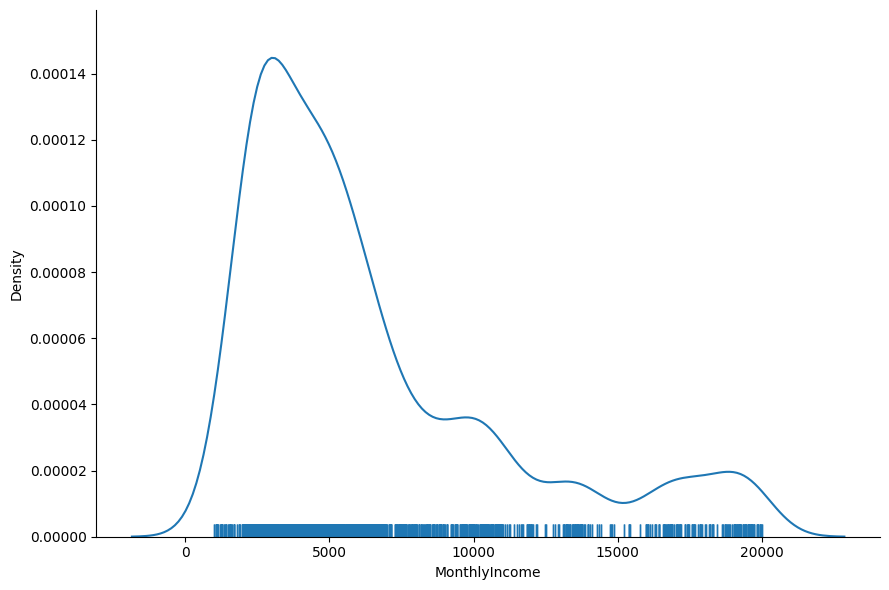

In [178]:
# rugplot - can either be used other distribution plots with rug = True, or drawn seperately with rugplot()
# the density of different datapoints in the data can be analyzed along the x -axis for each datapoint 

sns.displot(data = df_HR, x = 'MonthlyIncome',kind = 'kde',height = 6, aspect = 1.5, rug = True)
# kde with rug here makes sense

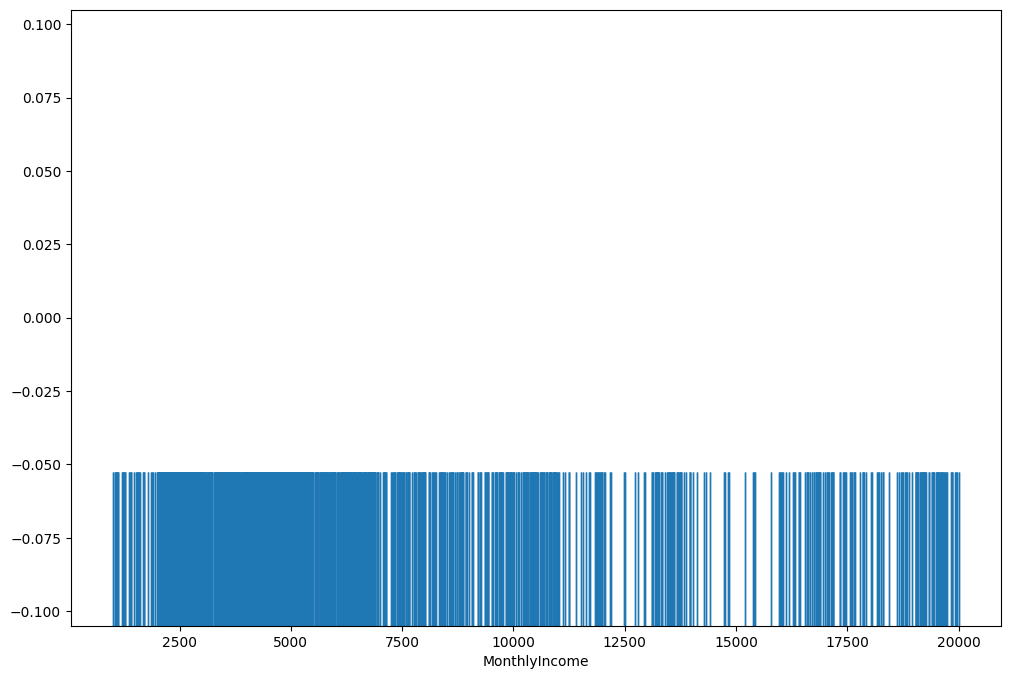

In [180]:
plt.figure(figsize = (12,8))
sns.rugplot(data = df_HR, x = 'MonthlyIncome', height = 0.25)
plt.show()

# for each datapoint it will draw one line- we can see where the values are dense( more values)
# here we can see from 2000 to 7300 there are lot of datapoints, then we observe they start to disperse a bit 

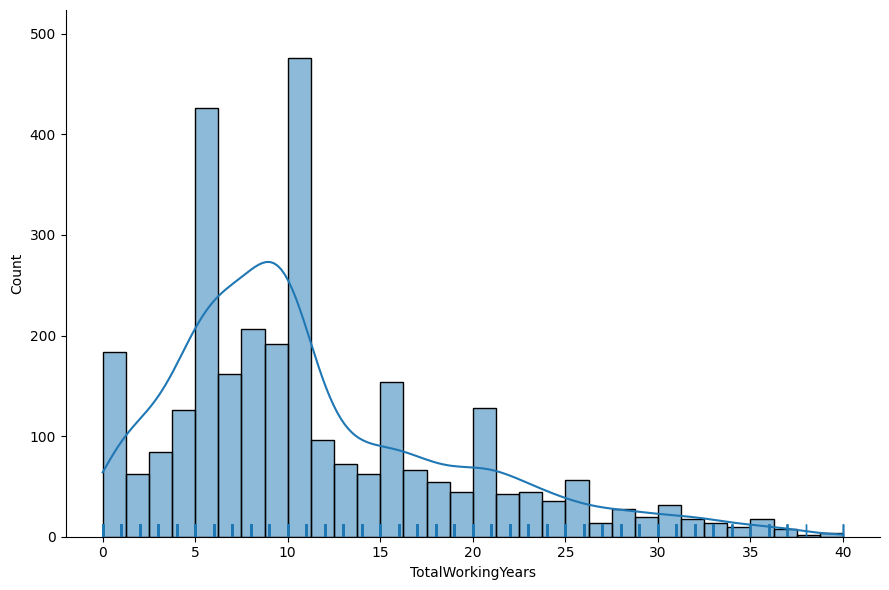

In [181]:
sns.displot(data = df_HR, x = 'TotalWorkingYears',height = 6, aspect = 1.5, kde = True, rug = True)
# rug doesn't show and doesn't make any sense to use here

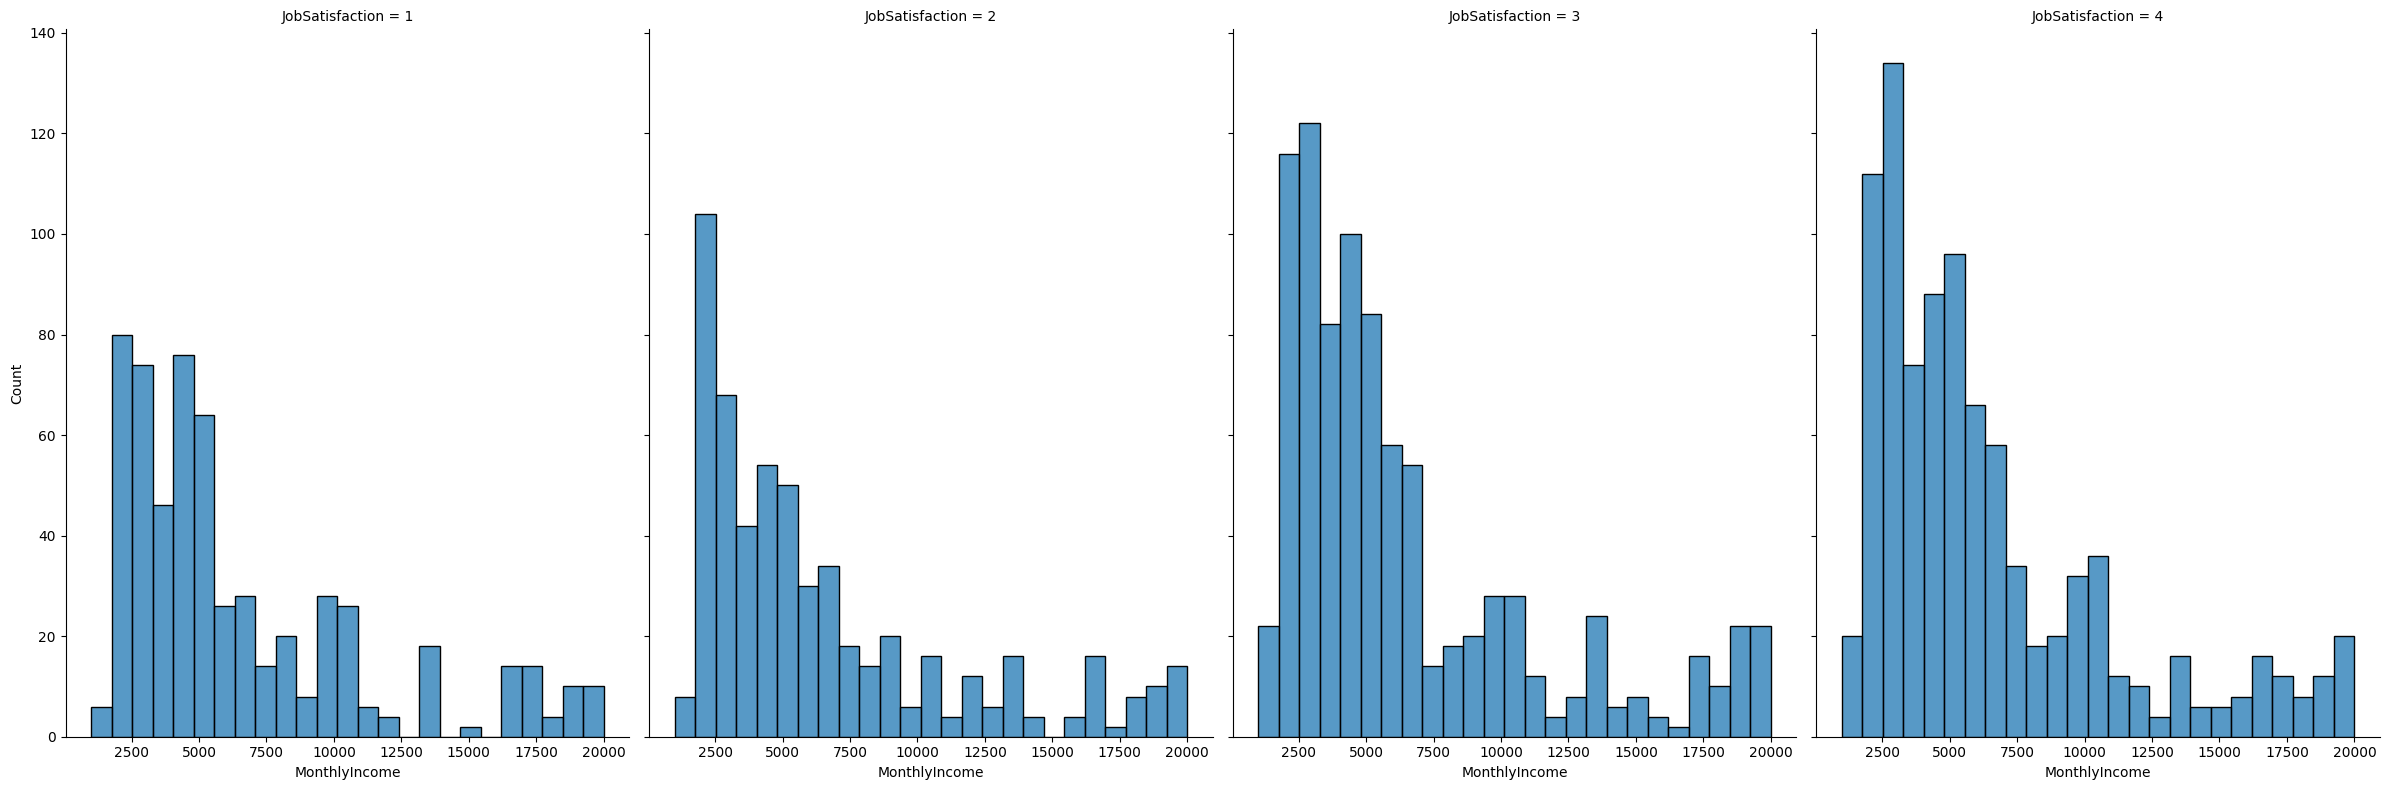

In [186]:
sns.displot(data = df_HR,x = 'MonthlyIncome',height = 8, aspect = 0.75,kind = 'hist',col = 'JobSatisfaction')

# col bifurcates the graph into different levels of column name
# it doesn't make sense to put this in numerical column
# usually used on categorical variable

# plotting Bivariate Distributions:

Visualizing the distribution of two independent variables. see how two independent variables are distributed with respect ot each other. 

--> Bivariate means joint, we use jointplot() function of seaborn lib to visualize it. 
--> jointplot() draws a scatterplot

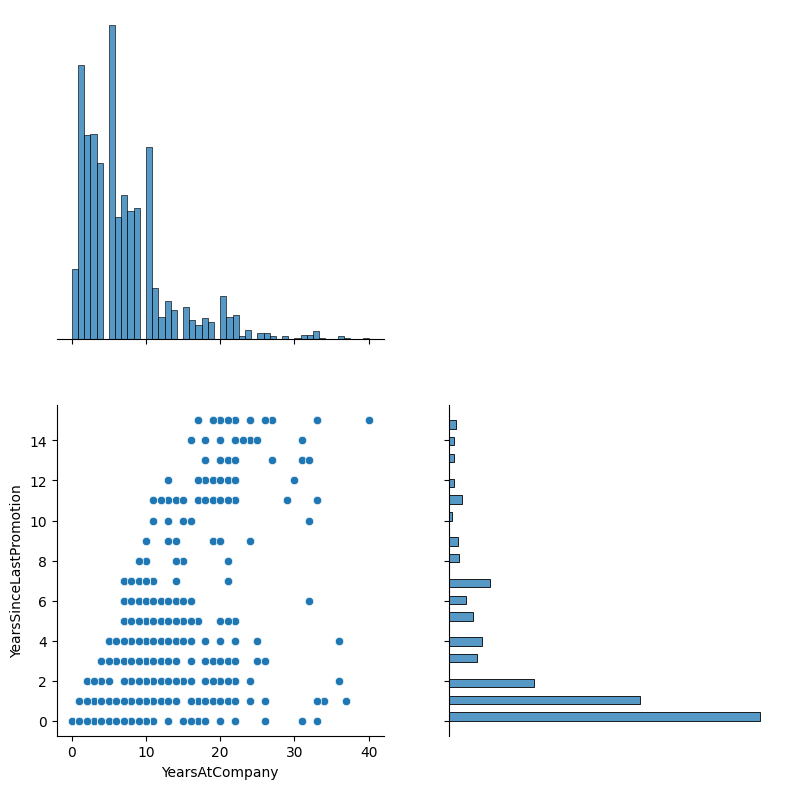

In [189]:
sns.jointplot(data = df_HR, x = 'YearsAtCompany', y = 'YearsSinceLastPromotion', height = 8, ratio = 1)

# seperate bar charts of two variables on either axes and in between a scatter plot to relation between 
# two variables - THESE ARE CALLED MARGINAL PLOTS

# ratio = 1 is 1:1 ratio 
# ratio = 2 is 2 times the size of histogram 

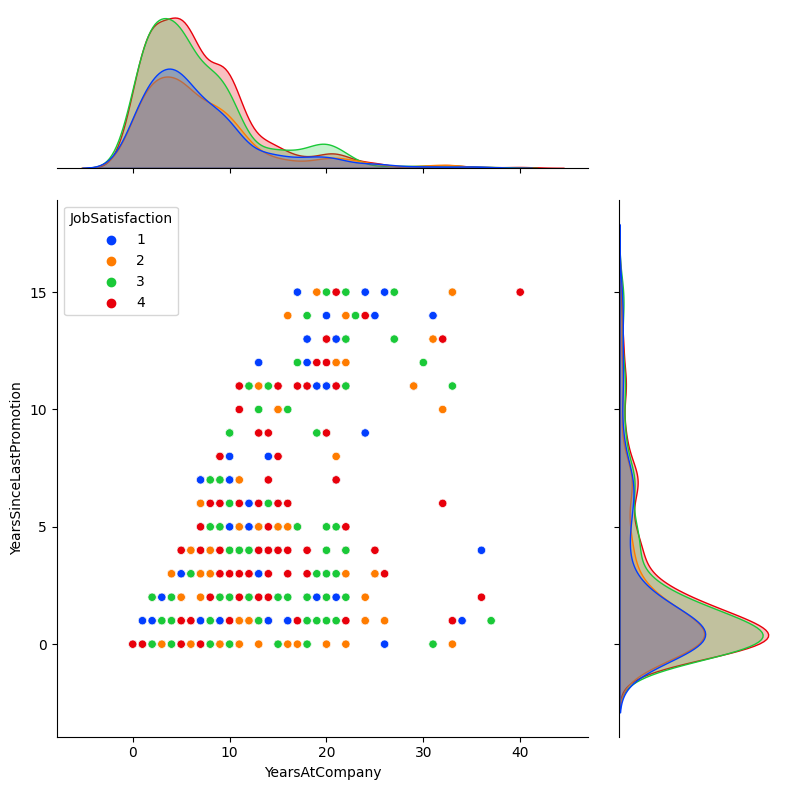

In [196]:
sns.jointplot(data = df_HR, x = 'YearsAtCompany', y = 'YearsSinceLastPromotion',hue = 'JobSatisfaction',\
              palette = 'bright',height = 8, ratio = 3)

# because it doesn't look neat with histogram, when we give option of hue, it automatically takes a kde plot 
# on either axes 


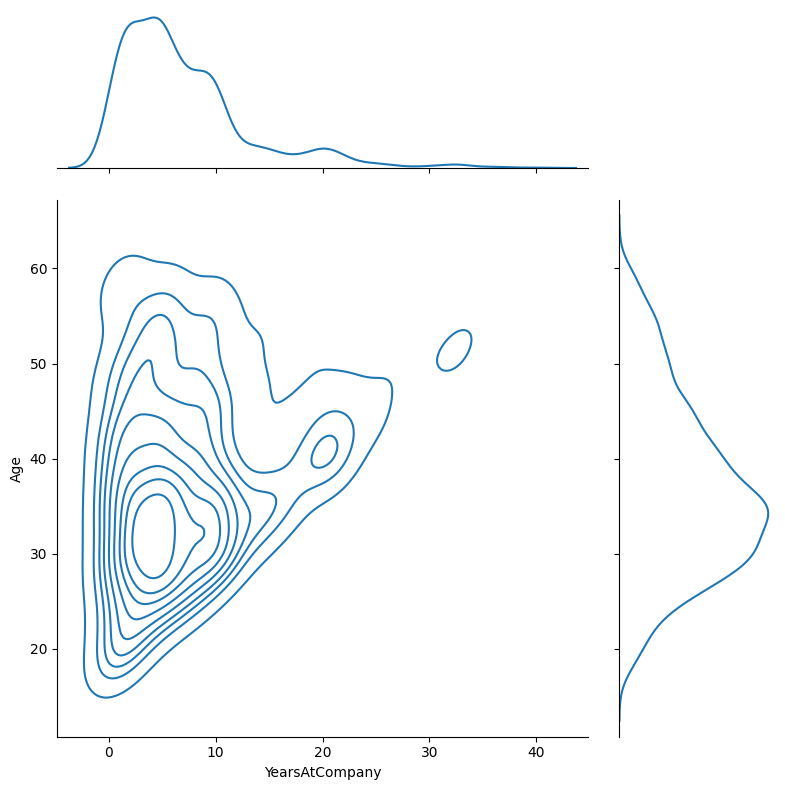

In [197]:
sns.jointplot(data = df_HR, x = 'YearsAtCompany', y='Age',height = 8, ratio = 3, kind = 'kde',palette = 'bright')
plt.show()

# ticks for marginal plots are available 
# not easy to decipher - this kde plot is supposed to be read as from a mountain top view 

# the best option to have as joint plot is scatter - easy to decipher 

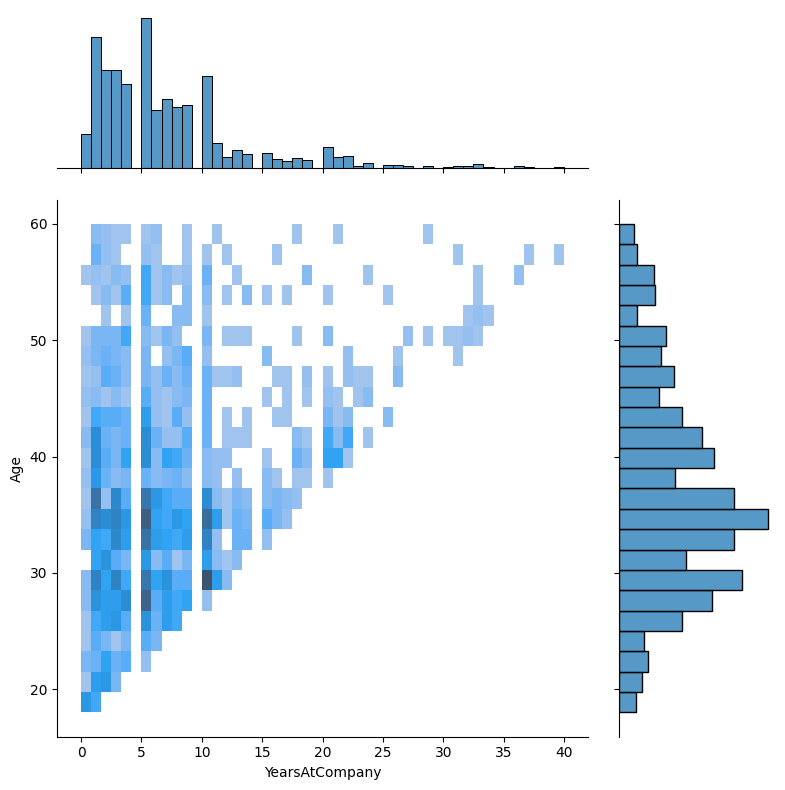

In [200]:
sns.jointplot(data = df_HR, x = 'YearsAtCompany', y='Age',height = 8, ratio = 3, kind = 'hist')
plt.show()

# when the two variables cross, darker shades - more dense data
# no data - blank
# less dense data - lighter shade

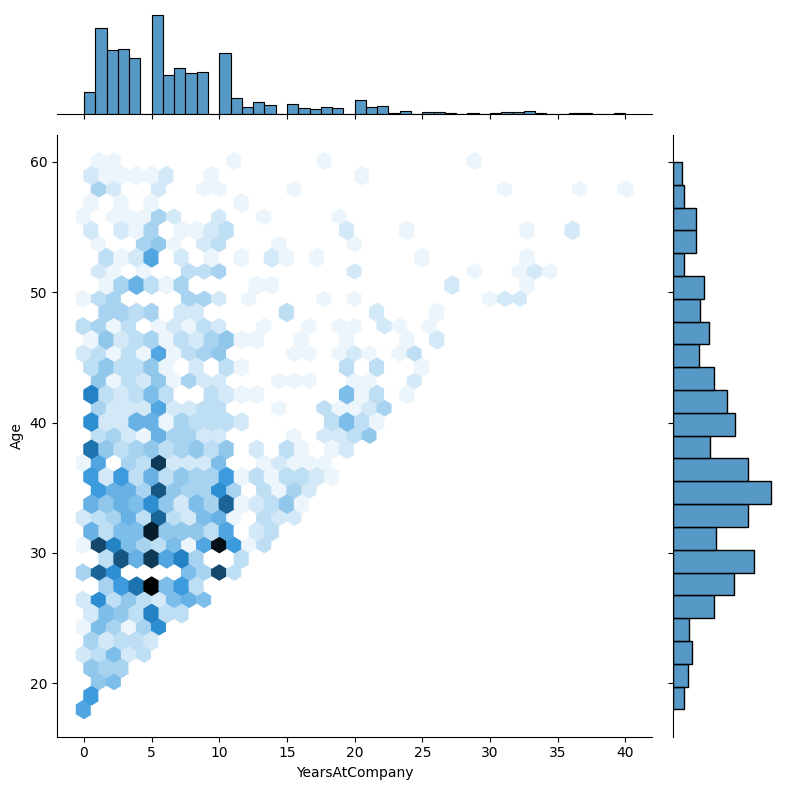

In [199]:
sns.jointplot(data = df_HR, x = 'YearsAtCompany', y = 'Age', height = 8, ratio = 5, kind = 'hex')
plt.show()

# hexagonal points on joint plot
# wherever density is more- darker shade
# less density - less shaded 

# slightly better to read than histogram 

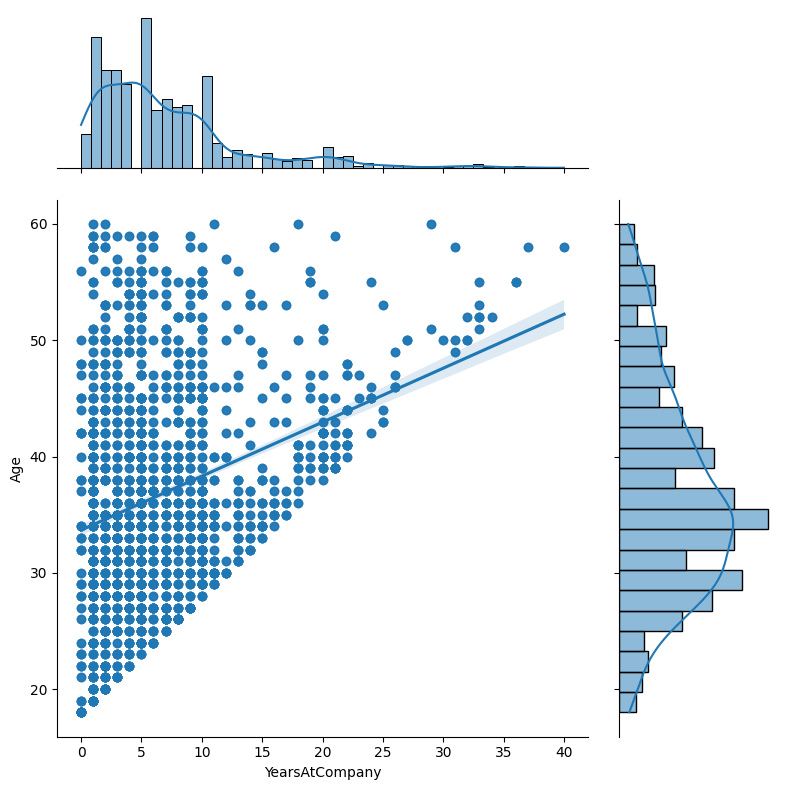

In [201]:
# reg
# is used to plot data along with linear regression model fit. LINE ACROSS THE GRAPH IS LINE OF BEST FIT. 
# direct func - regplot()
sns.jointplot(data = df_HR, x = 'YearsAtCompany', y = 'Age', height = 8, ratio = 3, kind = 'reg')
plt.show()

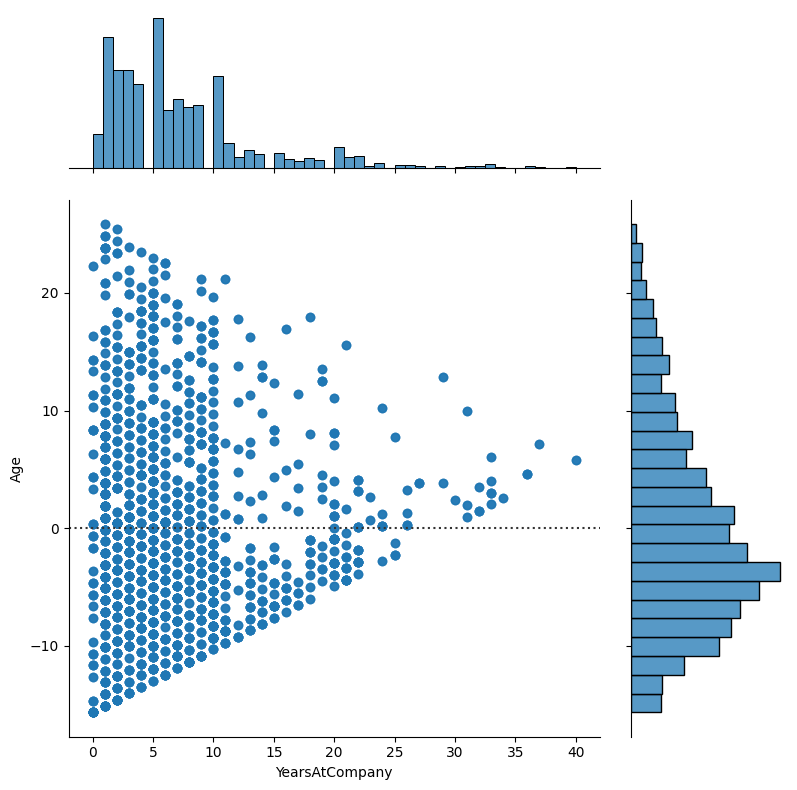

In [202]:
#resid
# to plot the residuals of linear regression model. THE BEST FIT IS THE DOTTED LINE THROUGH 0 ON X AXIS IN THE 
# GRAPH WITH RESIDUALS ON EITHER SIDE. 

sns.jointplot(data = df_HR, x = 'YearsAtCompany', y = 'Age', height = 8, ratio = 3, kind = 'resid')
plt.show()

In [203]:
# SCATTER, REG AND RESID ARE PRETTY EASY TO READ 

# Heatmaps: 

--> Heatmaps are graphical representation of data which use color-coding to show different values. 
--> Usually they are used to show values that are between a certain scale and change in HUE of single color makes it easier to identify the higher and lower value

--> although we have choice of using multi-colors in cmap to represent the data. It is usually not that effective 

In [205]:
df_hr_ft = pd.crosstab(df_HR['Department'], columns = [df_HR['Attrition']])
df_hr_ft

Attrition                 No  Yes
Department                       
Human Resources          102   24
Research & Development  1656  266
Sales                    708  184

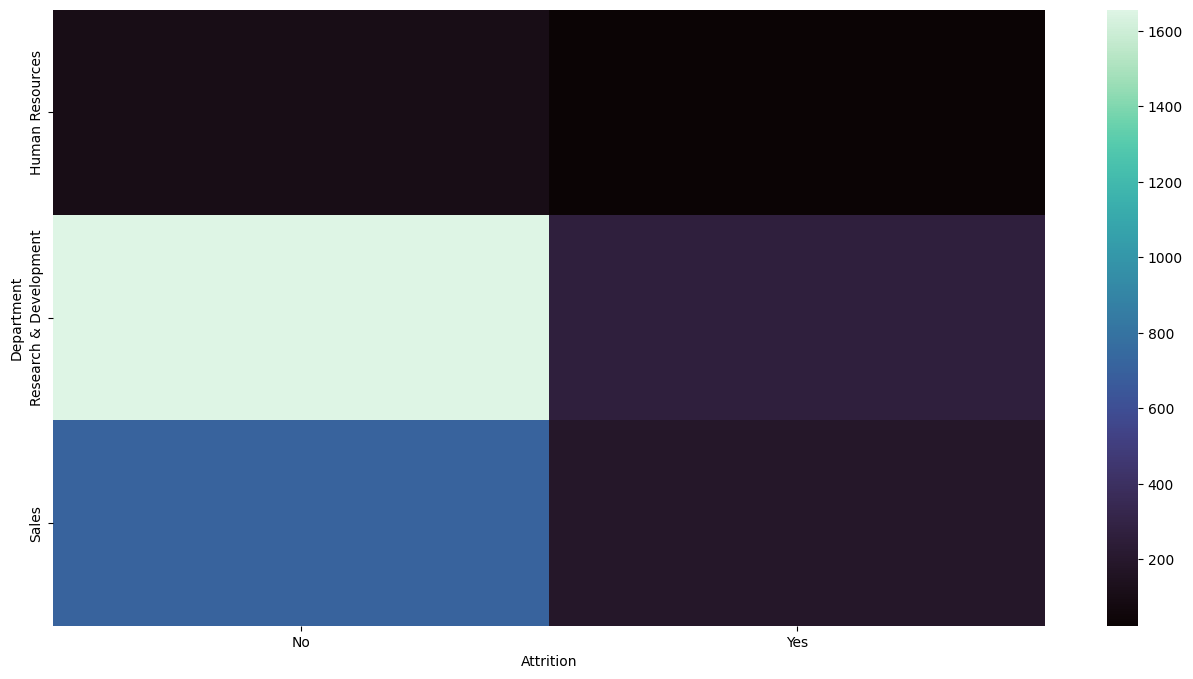

In [210]:
plt.figure(figsize =(16,8))
sns.heatmap(df_hr_ft,cmap = 'mako')
plt.show()

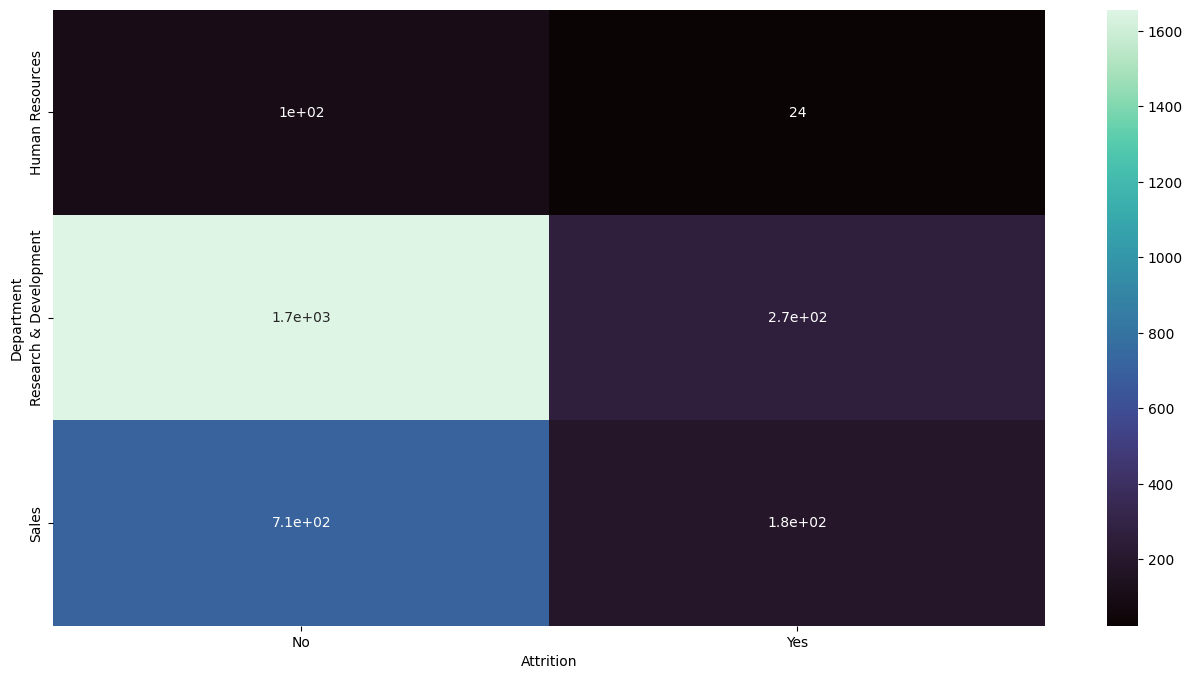

In [211]:
plt.figure(figsize =(16,8))
sns.heatmap(df_hr_ft,cmap = 'mako', annot = True)
plt.show()

 --> describes lowest value at 0 with color dark blue

== >
The range i from -1 to 1


==> -1 means inversely correlated
==>- 0 means no correlation
===>  1 means positive correlation

In [213]:
df_hr_num.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeNumber           -0.005175  -0.025742          0.016464   0.020950   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeNumber  EnvironmentSatisfaction  HourlyRate  \
Age                            -0.005175                 0.010146    0.024287   
DailyRate                      -0.025742                 0.018355    0.023381   
DistanceFromHome                0.016464                -0.016075    0.031131   
Education                       0.020950                -0.027128    0.016775   
EmployeeNumber                  1.000000                 0.008712    0.017377   
EnvironmentSatisfaction         0.008712                 1.000000   -0.049857   
HourlyRate                      0.017377                -0.049857    1.000000   
JobInvolvement                 -0.003552                -0.008278    0.042861   
JobLevel                       -0.009020                 0.001212   -0.027853   
JobSatisfaction                -0.022970                -0.006784   -0.071335   
MonthlyIncome                  -0.007188                -0.006259   -0.015794   
MonthlyRate                     0.006177                 0.037600   -0.015297   
NumCompaniesWorked             -0.000345                 0.012594    0.022157   
PercentSalaryHike              -0.006685                -0.031701   -0.009062   
PerformanceRating              -0.010338                -0.029548   -0.002172   
RelationshipSatisfaction       -0.034827                 0.007665    0.001330   
StockOptionLevel                0.031226                 0.003432    0.050263   
TotalWorkingYears              -0.007047                -0.002693   -0.002334   
TrainingTimesLastYear           0.011953                -0.019359   -0.008548   
WorkLifeBalance                 0.005370                 0.027627   -0.004607   
YearsAtCompany                 -0.005779                 0.001458   -0.019582   
YearsInCurrentRole             -0.004427                 0.018007   -0.024106   
YearsSinceLastPromotion        -0.004575                 0.016194   -0.026716   
YearsWithCurrManager           -0.004716                -0.004999   -0.020123   

                          JobInvolvement  JobLevel  Jo

In [214]:
# heatmaps are used primarily and initially in development of models. They help decide which features to drop(when
# two features are highly correlated, we don't want both of them- it is sort of biasing- double calculation(stats/
#ML) - every project needs a correlation-heatmap)

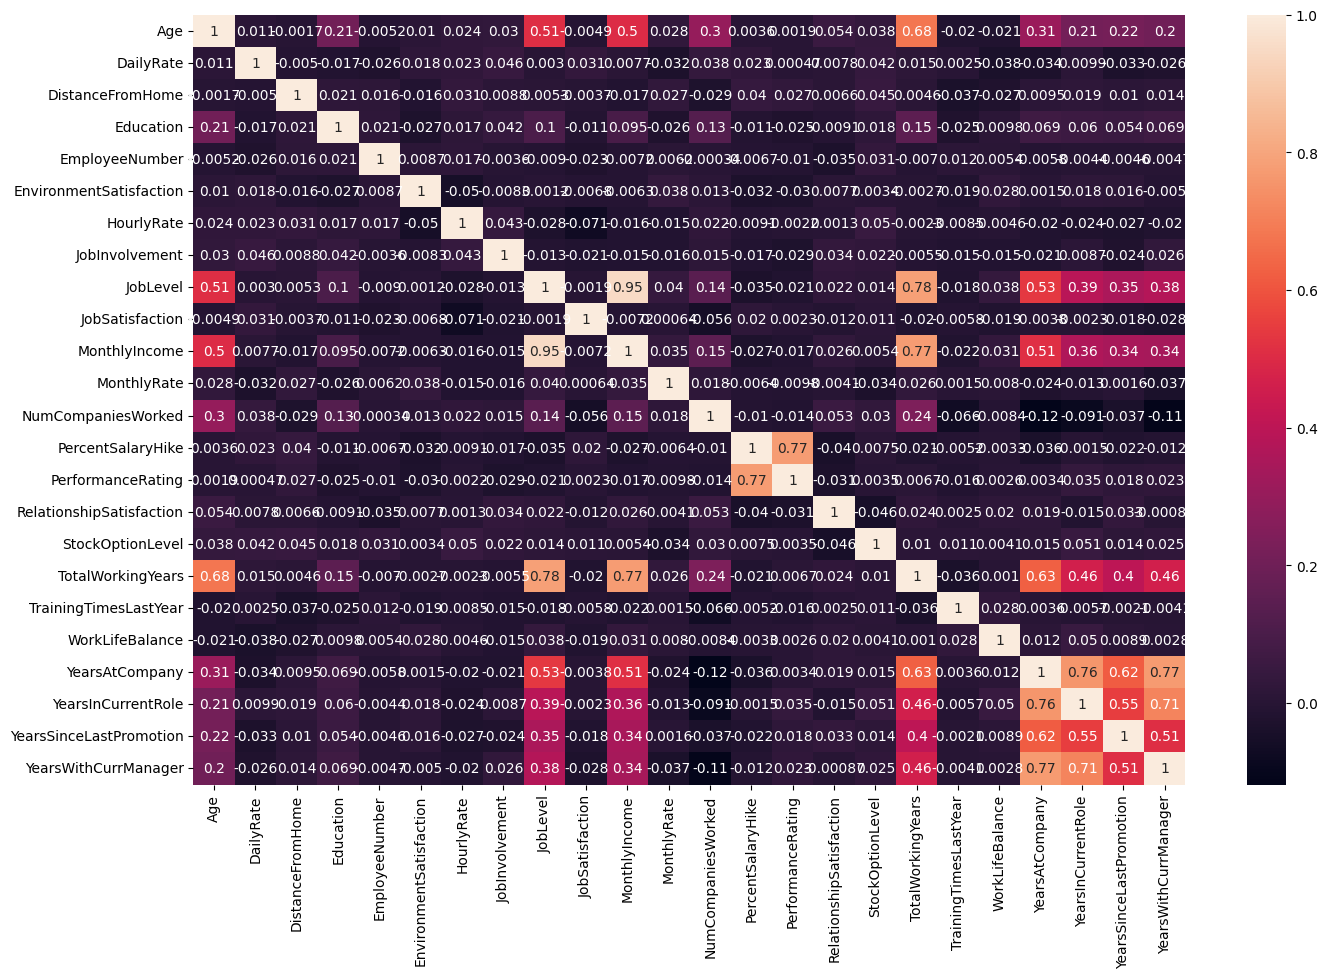

In [220]:
plt.figure(figsize = (16,10))
sns.heatmap(df_hr_num.corr(), annot = True)
plt.show()
#default

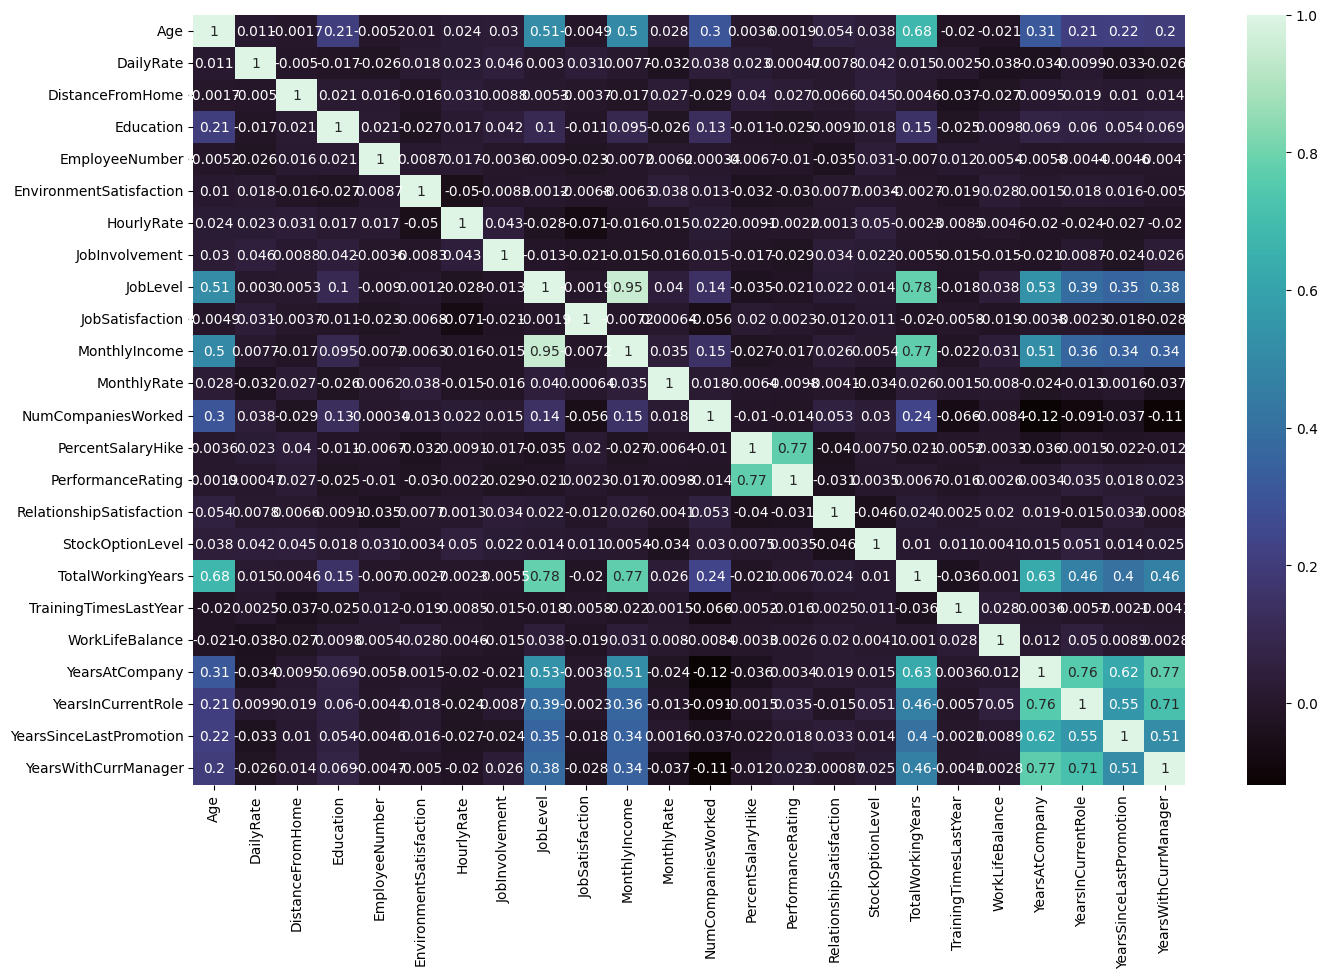

In [218]:
plt.figure(figsize = (16,10))
sns.heatmap(df_hr_num.corr(),cmap = sns.color_palette('mako', as_cmap = True), annot = True 
            # could give a variable instead of corr here too
plt.show()

--Above heatmap allows to see tha correlation of each column with other column (-1 representing perfect inverse correlation, 0 meaning no correlation, 1 meaning perfect positive correlation) We have 0.70 more to look for high positive and high negative correlations. 

--> so the data here is between -1 and 1. It is easily identified by the darkening of blue color for positive corelation adn lightening for negative correlation .

# visualizing pairwise relationships in a Dataset: 

We can also plot multiple bivariate distributions in a dataset by usig pairplot() function of seaborn library. 
This shows relationship between each column of the database ( you can choose few columns using copy function or creating a second sub df) It also draws the univariate distribution plot of each variable on the diagonal axis. 

In [221]:
df_hr_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [222]:
df_pp = df_hr_num[['Age', 'HourlyRate','JobSatisfaction','NumCompaniesWorked']].copy()
df_pp

Age  HourlyRate  JobSatisfaction  NumCompaniesWorked
0      41          94                4                   8
1      49          61                2                   1
2      37          92                3                   6
3      33          56                3                   1
4      27          40                2                   9
...   ...         ...              ...                 ...
2935   36          41                4                   4
2936   39          42                1                   4
2937   27          87                2                   1
2938   49          63                2                   2
2939   34          82                3                   2

[2940 rows x 4 columns]

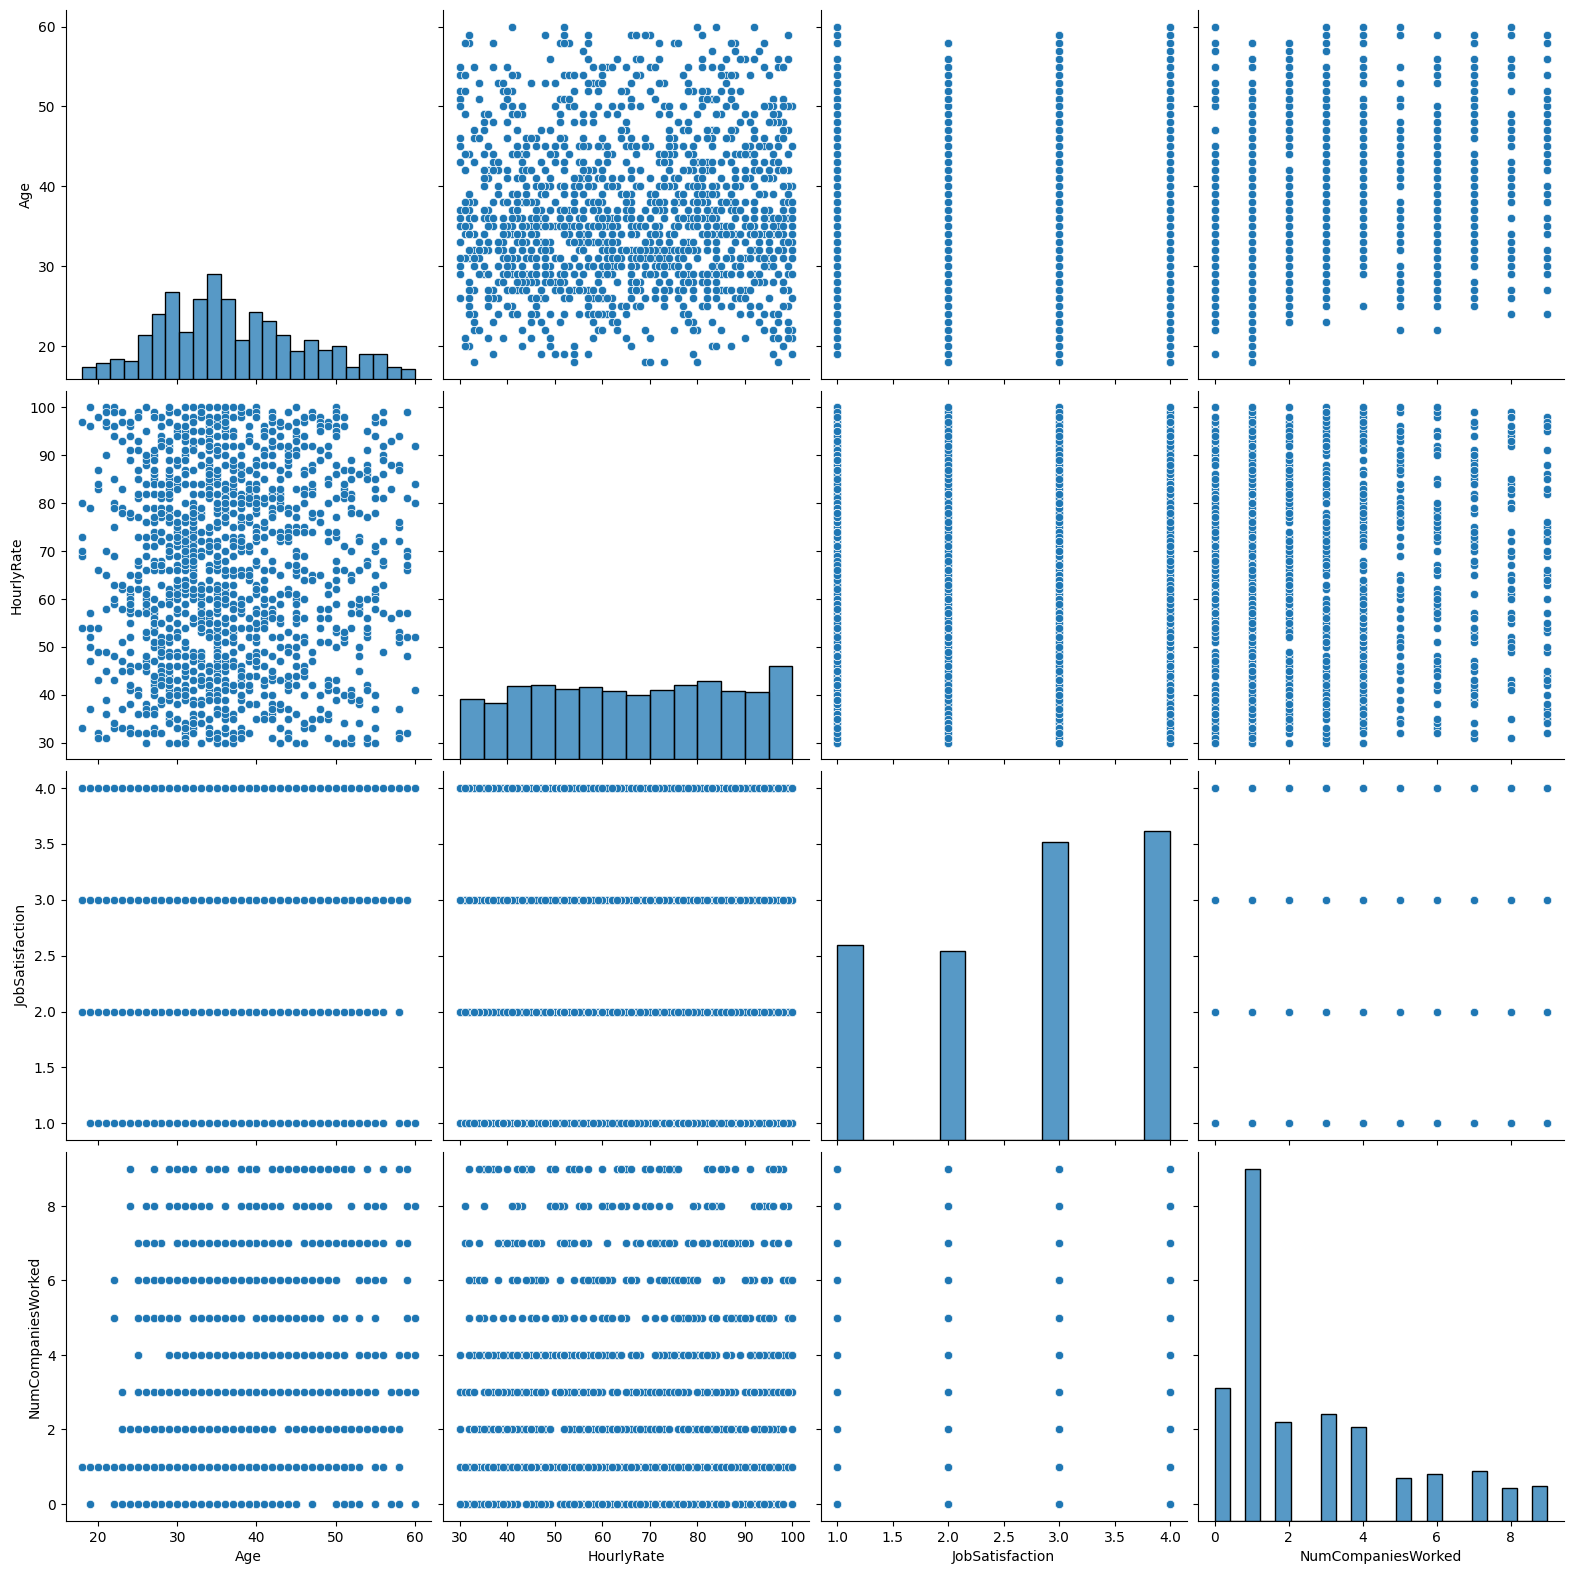

In [223]:
sns.pairplot(df_pp, height = 4, aspect = 1)
plt.show()

In pairplot, kind parameter (bivariate plot) takes following arguments, 'scatter','kde','hist','reg'
Default is 'scatter'

--> diag_kind parameter displays Univariate distribution of the column and takes following parameters:
'auto', 'hist','kde', None
Default is none

--> reg shows the regression along with the specified plot .

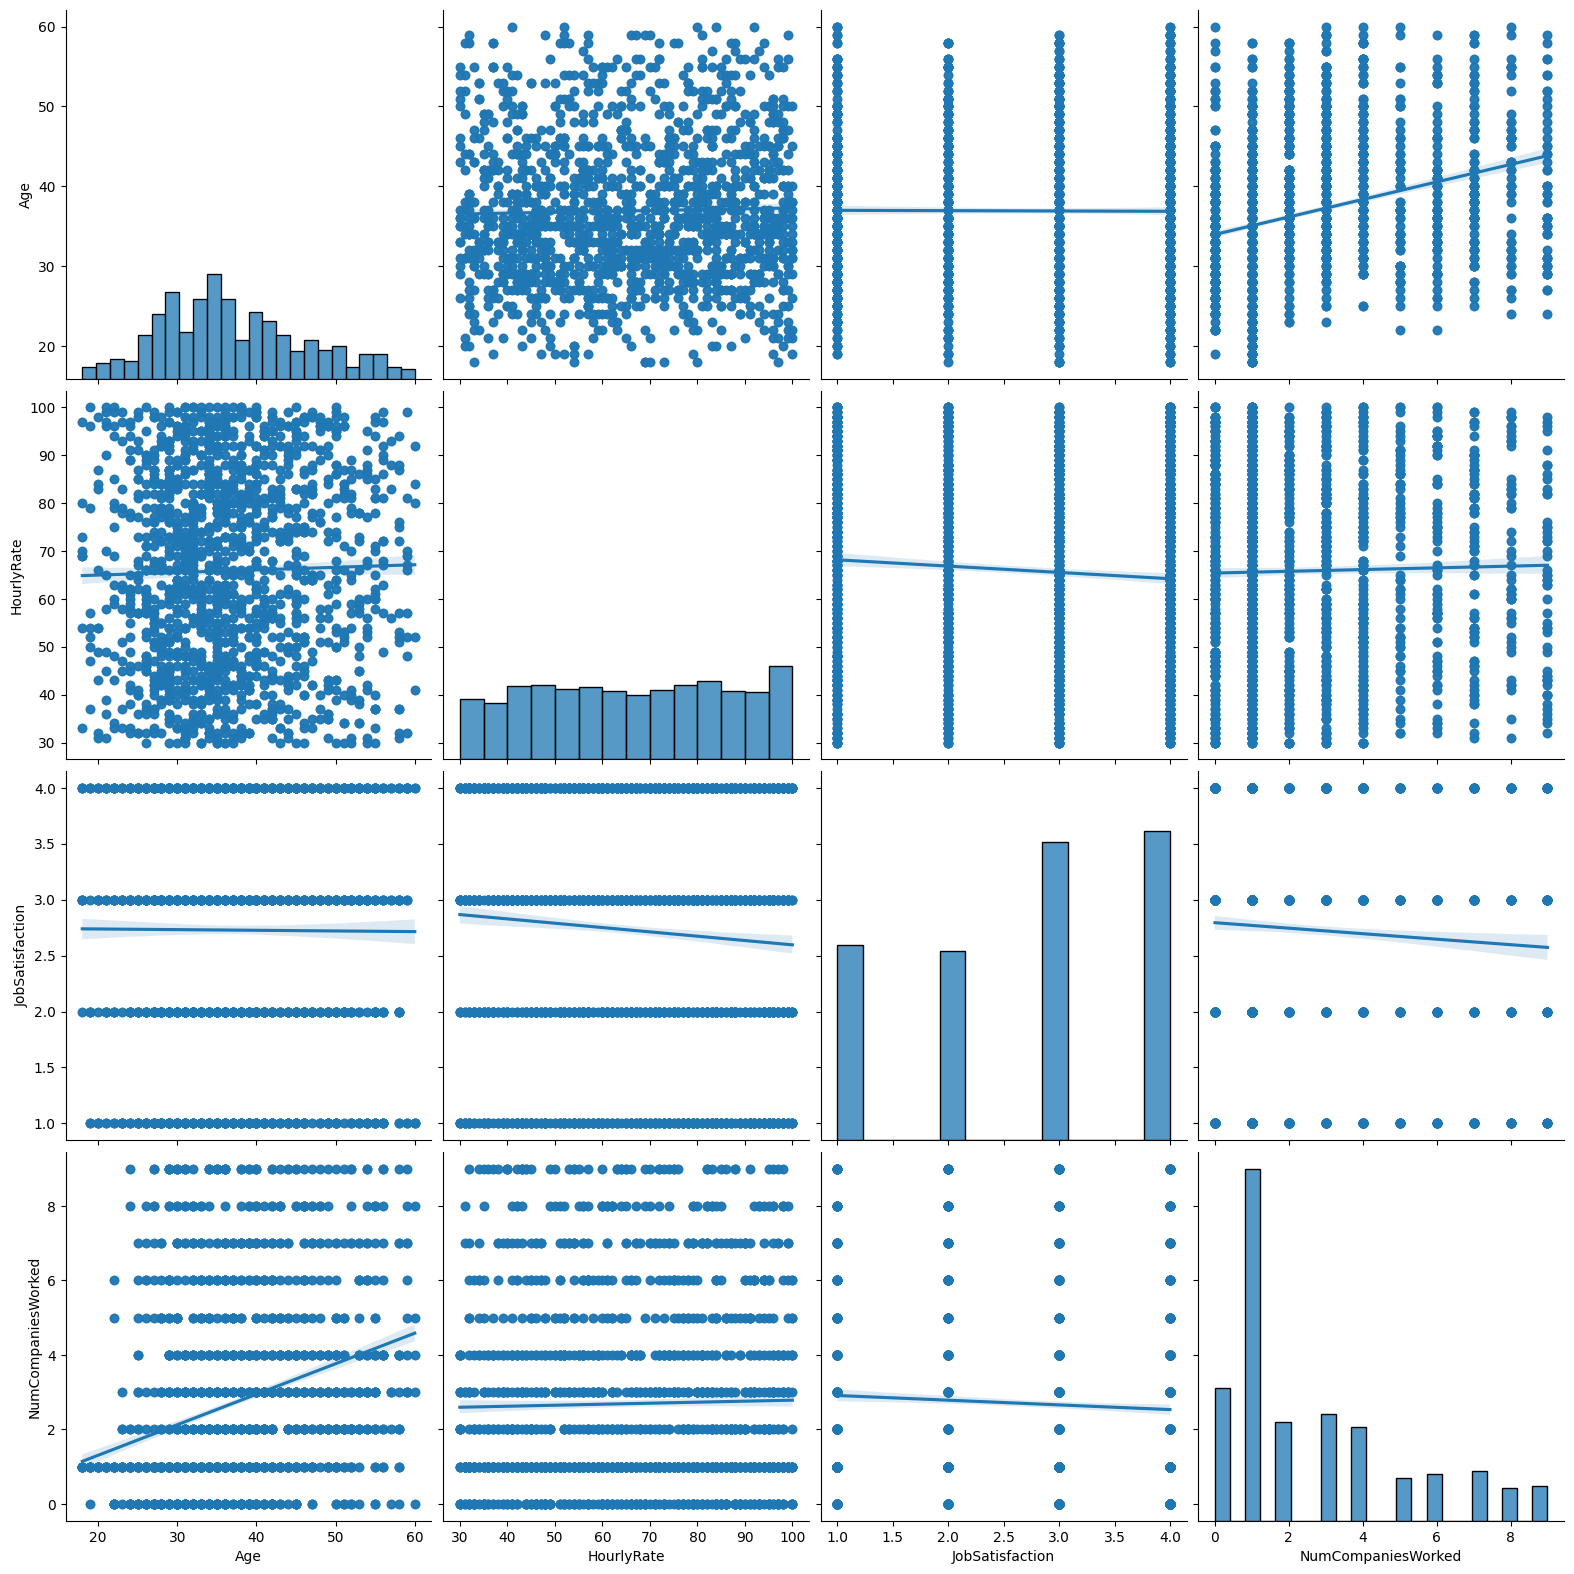

In [225]:
sns.pairplot(df_pp, height = 4, aspect = 1, kind = 'reg', diag_kind = 'hist')
plt.savefig('Pairplot.jpg')
plt.show()

# clustemap: 

--> A clustermap clusters the dataframe(heatmap of dataframe) and boxes on top of the map box tells us which features are clustered together. The cluster groups with colors shows.
--> This is used when too many datapoints are plotted close to each other so that the determining the variation and drawing conclusion becomes difficult. 

In [226]:
df_clma = df_hr_num[['Age','JobSatisfaction', 'YearsSinceLastPromotion']]
df_clma

Age  JobSatisfaction  YearsSinceLastPromotion
0      41                4                        0
1      49                2                        1
2      37                3                        0
3      33                3                        3
4      27                2                        2
...   ...              ...                      ...
2935   36                4                        0
2936   39                1                        1
2937   27                2                        0
2938   49                2                        0
2939   34                3                        1

[2940 rows x 3 columns]

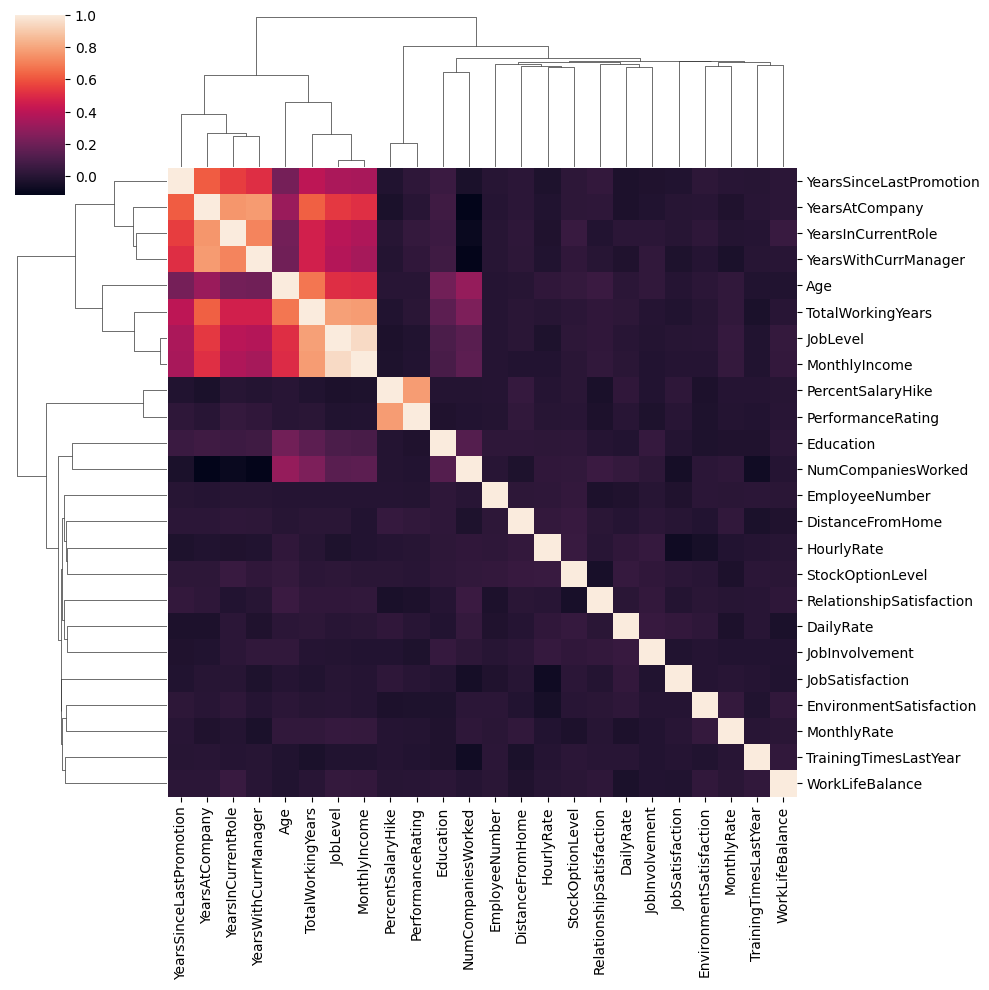

In [229]:
sns.clustermap(data = df_hr_num.corr())
plt.show()

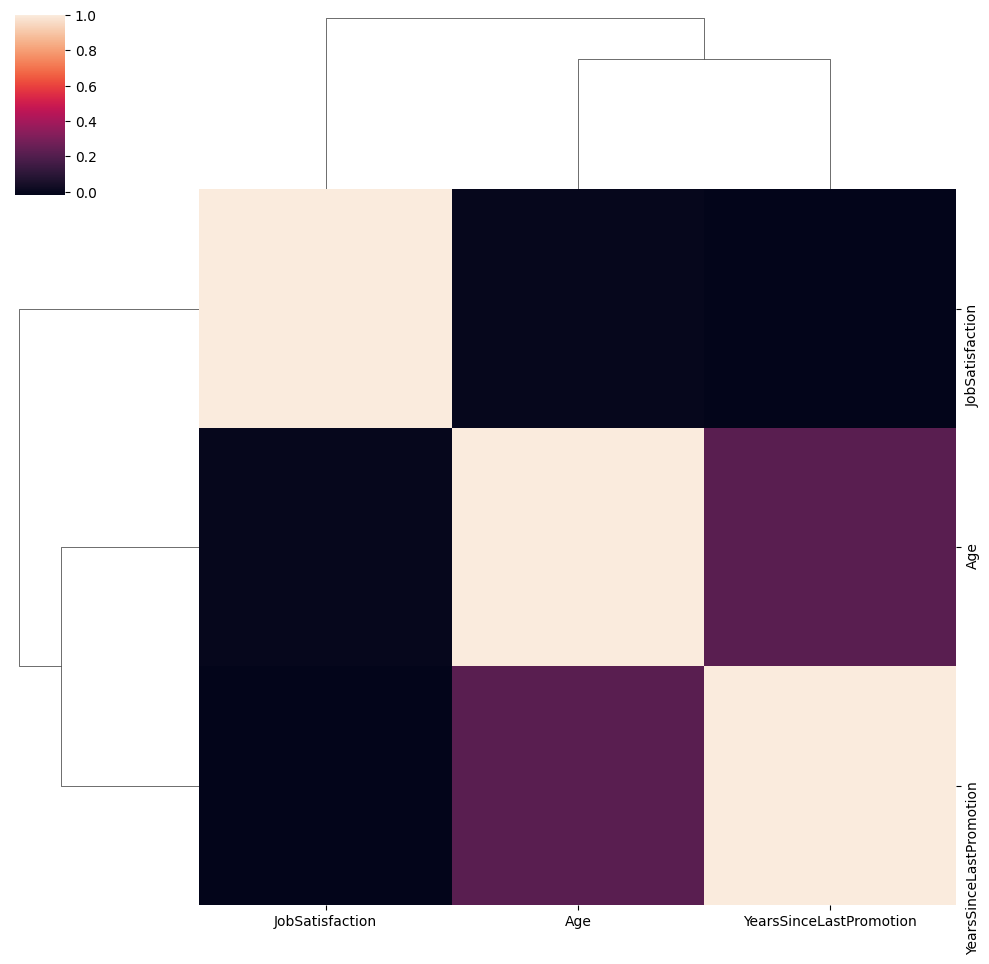

In [237]:
sns.clustermap(data = df_clma.corr())
plt.show()
# can also use for few features needed. 

In [233]:
# dogplot :)

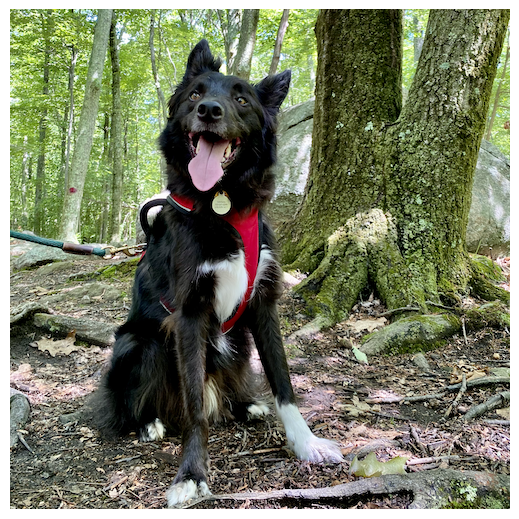

In [235]:
sns.dogplot()